#Group C

![picture](https://drive.google.com/uc?id=1yfPiWoGD5LB8oMCg4Yrp4u9XzSWJr7oh)

# Import Modul

In [2]:
from os import statvfs
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
from scipy import stats

# Mengabaikan warning untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi seaborn
sns.set(style="whitegrid")

# Load Data

In [4]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2024-09-25 23:17:46--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.08s   

2024-09-25 23:17:47 (824 KB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2024-09-25 23:17:47--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
H

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# Baca Data


**Data Tangerang**

In [3]:
dfT.columns

NameError: name 'dfT' is not defined

In [ ]:
# 10 baris Pertama dari Data
print("\n10 baris Pertama dari Data Tangerang:")
dfT.head(10)


10 baris Pertama dari Data Tangerang:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12-06-2021,60.0,36.0,2.0,1.0,NaN,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12-06-2021,37.0,72.0,2.0,1.0,1.0,1.0,"MAUK, TANGERANG",HGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12-06-2021,160.0,160.0,3.0,2.0,NaN,NaN,"CIKUPA CITRA JAYA, TANGERANG",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 10 baris terakhir dari Data
dfT.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
118,12-08-2021,300.0,148.0,4.0,3.0,2.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Bekasi**

In [ ]:
dfX.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# 10 baris Pertama dari Data
print("\n10 baris Pertama dari Data Bekasi:")
dfX.head(10)


10 baris Pertama dari Data Bekasi:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,08-12-2021,160.0,230.0,4.0,4.0,1.0,NaN,Kabupaten Bekasi,SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,08-12-2021,144.0,157.0,3.0,3.0,NaN,1.0,Kabupaten Bekasi,HGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,07-12-2021,336.0,200.0,4.0,3.0,NaN,1.0,Kabupaten Bekasi,HGB,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,07-12-2021,119.0,170.0,5.0,3.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,102.0,132.0,3.0,2.0,NaN,1.0,Kota Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 10 baris terakhir dari Data
dfX.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Depok**

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# 10 baris Pertama dari Data
print("\n10 baris Pertama dari Data Depok:")
dfD.head(10)


10 baris Pertama dari Data Depok:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6-12-2021,40,30.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6-12-2021,45,115.0,2.0,1.0,NaN,1.0,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6-12-2021,36,60.0,2.0,1.0,NaN,1.0,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6-12-2021,87,72.0,3.0,2.0,NaN,2.0,Sawangan,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 10 baris terakhir dari Data
dfD.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Bogor

In [ ]:
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# 10 baris Pertama dari Data
print("\n10 baris Pertama dari Data Bogor:")
dfB.head(10)


10 baris Pertama dari Data Bogor:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06-12-2021,120.0,70.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06-12-2021,125.0,125.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06-12-2021,97.0,72.0,3.0,2.0,0.0,1.0,Cibinong,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06-12-2021,72.0,33.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 10 baris terakhir dari Data
dfB.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

####Menghapus Variabel

##### Data Tangerang

In [ ]:
# Cek kolom
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Hapus kolom yang tidak diperlukan
dfT1 = dfT.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])


In [ ]:
# Cek kolom setelah dihapus
dfT1.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

##### Data Kota Bekasi

In [ ]:
dfX.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Hapus kolom yang tidak diperlukan
dfX1 = dfX.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

In [ ]:
# Cek kolom setelah dihapus
dfX1.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

##### Data Kota Depok

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Hapus kolom yang tidak diperlukan
dfD1 = dfD.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

##### Data Kota Jakarta

In [ ]:
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Hapus kolom yang tidak diperlukan
dfJ = dfJ.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

In [ ]:
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

##### Data Kota Bogor

In [ ]:
# Cek kolom
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Hapus kolom yang tidak diperlukan
dfB1 = dfB.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])


In [ ]:
# Cek kolom setelah dihapus
dfB1.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

####Menghapus Duplikat

##### Data Tangerang

In [ ]:
# Total duplikat data
dfT1.duplicated().sum()

3

In [ ]:
# Menampilkan data apa saja yang duplikat
dfT1[dfT1.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus duplikat
dfT2 = dfT1.drop_duplicates()

In [ ]:
# Total duplikat data
dfT2.duplicated().sum()

0

In [ ]:
dfT2.shape

(125, 14)

##### Data Bekasi

In [ ]:
# Total duplikat data
dfX1.duplicated().sum()

884

In [ ]:
# Menampilkan data apa saja yang duplikat
dfX1[dfX1.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus duplikat
dfX2 = dfX1.drop_duplicates()

In [ ]:
# Total duplikat data
dfX2.duplicated().sum()

0

In [ ]:
dfX2.shape

(108, 14)

##### Data Depok

In [ ]:
# Total duplikat data
dfD1.duplicated().sum()

877

In [ ]:
# Menampilkan data apa saja yang duplikat
dfD1[dfD1.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus duplikat
dfD2 = dfD1.drop_duplicates()

In [ ]:
# Total duplikat data
dfD2.duplicated().sum()

0

In [ ]:
dfD2.shape

(121, 14)

##### Data Jakarta

In [ ]:
# Total duplikat data
dfJ.duplicated().sum()

902

In [ ]:
# Menampilkan data apa saja yang duplikat
dfJ[dfJ.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ = dfJ.drop_duplicates()

In [ ]:
# Total duplikat data
dfJ.duplicated().sum()

0

In [ ]:
dfJ.shape

(122, 14)

#####Data Bogor

In [ ]:
# Total duplikat data
dfB1.duplicated().sum()

805

In [ ]:
# Menampilkan data apa saja yang duplikat
dfB1[dfB1.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus duplikat
dfB2 = dfB1.drop_duplicates()

In [ ]:
# Total duplikat data
dfB2.duplicated().sum()

0

In [ ]:
dfB2.shape

(194, 14)

####Statistika Deskriptif

##### Data Tangerang

In [ ]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(dfT2.describe())


Descriptive Statistics:
                LT           LB          KT          KM     garasi    carport  \
count   124.000000   124.000000  124.000000  124.000000  38.000000  92.000000   
mean    202.653226   199.491935    3.346774    2.693548   2.210526   1.608696   
std     285.219301   264.097681    1.097257    1.295253   1.862255   1.222109   
min      37.000000    27.000000    2.000000    1.000000   1.000000   1.000000   
25%      90.000000    81.500000    3.000000    2.000000   1.000000   1.000000   
50%     150.500000   125.000000    3.000000    2.000000   2.000000   1.000000   
75%     250.000000   240.000000    4.000000    3.000000   2.000000   2.000000   
max    3087.000000  2500.000000    8.000000    8.000000  10.000000  10.000000   

            listrik          harga  
count    111.000000     124.000000  
mean    3962.162162    3849.556452  
std     6757.743761    9316.413817  
min     1300.000000      95.000000  
25%     2200.000000    1037.500000  
50%     2200.000000    

In [ ]:
# Info data
print("Informasi Data Tangerang:")
dfT2.info()

Informasi Data Tangerang:
<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      38 non-null     float64
 6   carport     92 non-null     float64
 7   lokasi      124 non-null    object 
 8   sertifikat  122 non-null    object 
 9   listrik     111 non-null    float64
 10  hadap       49 non-null     object 
 11  harga       124 non-null    float64
 12  URL         124 non-null    object 
 13  deskripsi   124 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.6+ KB


##### Data Bekasi

In [ ]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(dfX2.describe())


Descriptive Statistics:
               LT          LB          KT          KM     garasi    carport  \
count  107.000000  107.000000  107.000000  106.000000  33.000000  81.000000   
mean   108.822430  110.635514    2.962617    1.943396   1.090909   1.086420   
std     59.164914   71.755270    1.027226    0.848867   0.291937   0.282734   
min     36.000000   30.000000    1.000000    1.000000   1.000000   1.000000   
25%     72.000000   60.000000    2.000000    1.000000   1.000000   1.000000   
50%     91.000000   90.000000    3.000000    2.000000   1.000000   1.000000   
75%    130.500000  144.000000    4.000000    2.750000   1.000000   1.000000   
max    364.000000  494.000000    7.000000    4.000000   2.000000   2.000000   

           listrik         harga  
count   101.000000  1.070000e+02  
mean   2056.435644  1.074823e+09  
std     969.578861  7.516152e+08  
min     900.000000  1.600000e+08  
25%    1300.000000  5.805000e+08  
50%    2200.000000  9.200000e+08  
75%    2200.000000

In [ ]:
# Info data
print("Informasi Data Bekasi:")
dfX2.info()

Informasi Data Bekasi:
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 12.7+ KB


##### Data Depok

In [ ]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(dfD2.describe())


Descriptive Statistics:
               LB          KT          KM     garasi    carport       listrik  \
count  118.000000  118.000000  118.000000  25.000000  94.000000    103.000000   
mean    92.618644    2.737288    1.940678   1.760000   1.670213   2147.572816   
std     92.630404    1.024720    0.980950   1.392839   1.061428   1166.261386   
min     15.000000    2.000000    1.000000   1.000000   1.000000    900.000000   
25%     46.000000    2.000000    1.000000   1.000000   1.000000   1300.000000   
50%     61.000000    3.000000    2.000000   1.000000   1.000000   2200.000000   
75%    102.250000    3.000000    2.000000   2.000000   2.000000   2200.000000   
max    600.000000    7.000000    5.000000   6.000000   7.000000  10000.000000   

             harga  
count   118.000000  
mean   1194.440678  
std    1474.387409  
min      41.000000  
25%     485.000000  
50%     810.000000  
75%    1137.500000  
max    9000.000000  


In [ ]:
# Info data
print("Informasi Data Depok:")
dfD2.info()

Informasi Data Depok:
<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  119 non-null    object 
 1   LT          120 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   garasi      25 non-null     float64
 6   carport     94 non-null     float64
 7   lokasi      118 non-null    object 
 8   sertifikat  118 non-null    object 
 9   listrik     103 non-null    float64
 10  hadap       62 non-null     object 
 11  harga       118 non-null    float64
 12  URL         118 non-null    object 
 13  deskripsi   118 non-null    object 
dtypes: float64(7), object(7)
memory usage: 14.2+ KB


##### Data Jakarta

In [ ]:
print("\nDescriptive Statistics:")
print(dfJ.describe())


Descriptive Statistics:
                LT           LB          KT          KM     garasi    carport  \
count   121.000000   121.000000  121.000000  121.000000  44.000000  90.000000   
mean    247.586777   279.495868    4.272727    3.380165   1.863636   1.955556   
std     368.384642   285.275631    1.901754    1.709075   1.518734   1.475730   
min      16.000000    21.000000    1.000000    1.000000   1.000000   1.000000   
25%      84.000000    97.000000    3.000000    2.000000   1.000000   1.000000   
50%     135.000000   200.000000    4.000000    3.000000   1.000000   2.000000   
75%     250.000000   350.000000    5.000000    4.000000   2.000000   2.000000   
max    3422.000000  2000.000000   10.000000   10.000000   8.000000  10.000000   

            listrik         harga  
count    120.000000  1.210000e+02  
mean    5425.000000  8.985955e+09  
std     7891.589502  1.587610e+10  
min      900.000000  3.800000e+08  
25%     2200.000000  1.600000e+09  
50%     3500.000000  3.400000

In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.3+ KB


#####Data Bogor

In [ ]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(dfB2.describe())


Descriptive Statistics:
                LT           LB          KT          KM      garasi  \
count   193.000000   193.000000  193.000000  193.000000  193.000000   
mean    143.575130    98.663212    2.694301    1.797927    0.155440   
std     191.576208   125.851746    1.110939    1.175087    0.485931   
min      30.000000    21.000000    1.000000    1.000000    0.000000   
25%      66.000000    36.000000    2.000000    1.000000    0.000000   
50%      84.000000    58.000000    2.000000    1.000000    0.000000   
75%     120.000000    90.000000    3.000000    2.000000    0.000000   
max    1500.000000  1200.000000    8.000000    6.000000    3.000000   

          carport       listrik         harga  
count  193.000000    193.000000  1.930000e+02  
mean     1.310881   2076.165803  1.289362e+09  
std      0.905271   1562.633932  2.115854e+09  
min      0.000000    900.000000  6.500000e+07  
25%      1.000000   1300.000000  3.990000e+08  
50%      1.000000   1300.000000  6.700000e+08  

In [ ]:
# Info data
print("Informasi Data Bogor:")
dfB2.info()

Informasi Data Bogor:
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
dtypes: float64(8), object(6)
memory usage: 22.7+ KB


#### Missing Value

##### Data Tangerang

In [ ]:
# Cek Missing Value
print("\nCek Missing Values di Data Tangerang:")
dfT2.isnull().sum()


Cek Missing Values di Data Tangerang:


,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,87
carport,33
lokasi,1
sertifikat,3
listrik,14


In [ ]:
# Persentase Missing Value
(dfT2.isnull().sum()/len(dfT2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.8
LT,0.8
LB,0.8
KT,0.8
KM,0.8
garasi,69.6
carport,26.4
lokasi,0.8
sertifikat,2.4
listrik,11.2


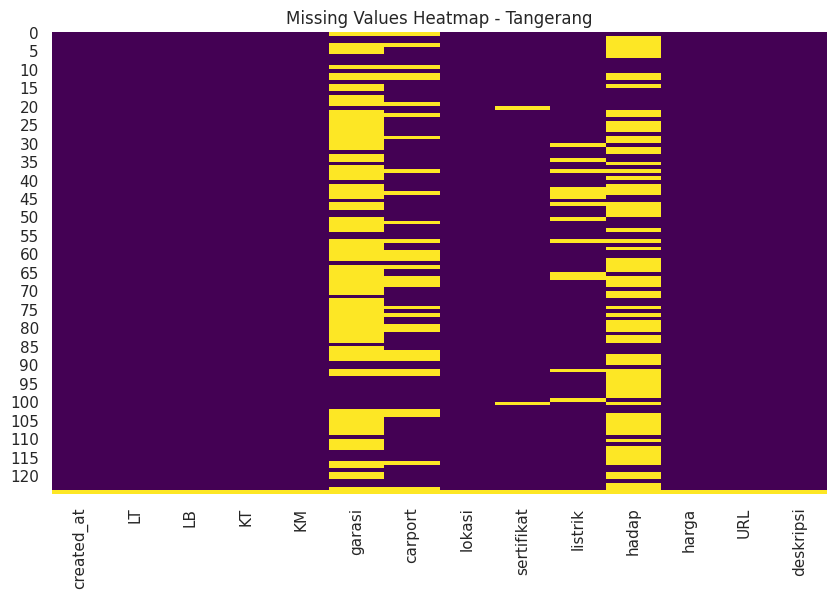

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfT2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Tangerang')
plt.show()

In [ ]:
# 1. Mengisi missing values untuk kolom numerik
dfT2['LT'].fillna(dfT2['LT'].mean(), inplace=True)  # Luas Tanah
dfT2['LB'].fillna(dfT2['LB'].mean(), inplace=True)  # Luas Bangunan
dfT2['KT'].fillna(dfT2['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfT2['KM'].fillna(dfT2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfT2['garasi'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada garasi
dfT2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfT2['listrik'].fillna(dfT2['listrik'].mean(), inplace=True)  # Daya listrik

#Mengisi Missing Value dengan modus
dfT2['sertifikat'].fillna(dfT2['sertifikat'].mode()[0], inplace=True)
dfT2['hadap'].fillna(dfT2['hadap'].mode()[0], inplace=True)
dfT2['lokasi'].fillna(dfT2['lokasi'].mode()[0], inplace=True)
dfT2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# 3. Mengisi dengan forward fill untuk kolom waktu
dfT2['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik
dfT2['harga'] = dfT2['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfT2['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Tampilkan DataFrame setelah mengisi missing values
print(dfT2)


     created_at          LT          LB   KT   KM  garasi  carport  \
0    12-06-2021   60.000000   50.000000  3.0  2.0     0.0      0.0   
1    12-06-2021   72.000000   54.000000  2.0  1.0     1.0      1.0   
2    12-06-2021   60.000000   48.000000  3.0  2.0     2.0      2.0   
3    12-06-2021  200.000000  225.000000  5.0  4.0     0.0      0.0   
4    12-06-2021   76.000000  123.000000  3.0  3.0     0.0      2.0   
..          ...         ...         ...  ...  ...     ...      ...   
120  12-08-2021   66.000000   70.000000  3.0  2.0     0.0      1.0   
121  12-08-2021  202.000000   85.000000  4.0  3.0     1.0      1.0   
122  12-08-2021  108.000000  130.000000  3.0  3.0     1.0      1.0   
123  12-08-2021   91.000000   91.000000  3.0  2.0     0.0      0.0   
124  12-08-2021  202.653226  199.491935  3.0  2.0     0.0      0.0   

                        lokasi sertifikat      listrik    hadap   harga  \
0          BSD CITY, TANGERANG        SHM  1300.000000  Selatan   500.0   
1        

In [ ]:
# Cek Missing Value setelah ditangani dengan imputasi
print("\nCek Missing Values di Data Tangerang:")
dfT2.isnull().sum()


Cek Missing Values di Data Tangerang:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


##### Data Bekasi

In [ ]:
# Cek Missing Value
print("\nCek Missing Values di Data Bekasi:")
dfX2.isnull().sum()


Cek Missing Values di Data Bekasi:


,0
created_at,1
LT,1
LB,1
KT,1
KM,2
garasi,75
carport,27
lokasi,1
sertifikat,2
listrik,7


In [ ]:
# Persentase Missing Value
(dfX2.isnull().sum()/len(dfX2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.925926
LT,0.925926
LB,0.925926
KT,0.925926
KM,1.851852
garasi,69.444444
carport,25.000000
lokasi,0.925926
sertifikat,1.851852
listrik,6.481481


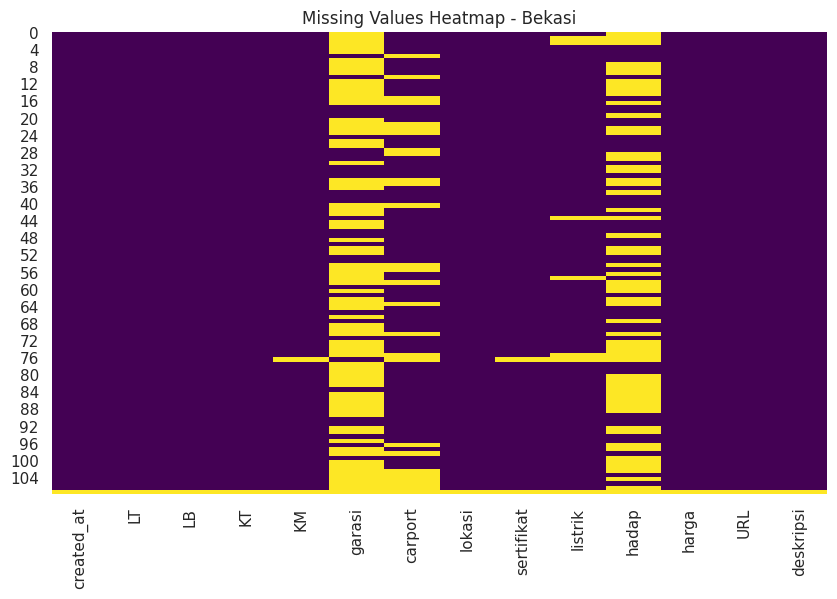

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfX2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Bekasi')
plt.show()

In [ ]:
# 1. Mengisi missing values untuk kolom numerik
dfX2['LT'].fillna(dfX2['LT'].mean(), inplace=True)  # Luas Tanah
dfX2['LB'].fillna(dfX2['LB'].mean(), inplace=True)  # Luas Bangunan
dfX2['KT'].fillna(dfX2['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfX2['KM'].fillna(dfX2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfX2['garasi'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada garasi
dfX2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfX2['listrik'].fillna(dfX2['listrik'].mean(), inplace=True)  # Daya listrik

#Mengisi Missing Value dengan modus
dfX2['sertifikat'].fillna(dfX2['sertifikat'].mode()[0], inplace=True)
dfX2['hadap'].fillna(dfX2['hadap'].mode()[0], inplace=True)
dfX2['lokasi'].fillna(dfX2['lokasi'].mode()[0], inplace=True)
dfX2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# 3. Mengisi dengan forward fill untuk kolom waktu
dfX2['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik
dfX2['harga'] = dfX2['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfX2['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Tampilkan DataFrame setelah mengisi missing values
print(dfX2)


     created_at         LT          LB   KT   KM  garasi  carport  \
0    08-12-2021   71.00000   43.000000  2.0  1.0     0.0      1.0   
1    08-12-2021   59.00000   60.000000  2.0  1.0     0.0      1.0   
2    08-12-2021  124.00000   95.000000  2.0  1.0     0.0      1.0   
3    08-12-2021  144.00000  100.000000  2.0  1.0     0.0      1.0   
4    08-12-2021  108.00000  100.000000  3.0  2.0     0.0      1.0   
..          ...        ...         ...  ...  ...     ...      ...   
103  01-12-2021  140.00000  250.000000  3.0  2.0     0.0      0.0   
104  01-12-2021   60.00000   55.000000  2.0  1.0     0.0      0.0   
105  01-12-2021   36.00000   60.000000  2.0  1.0     0.0      0.0   
106  01-12-2021   60.00000   55.000000  2.0  1.0     0.0      0.0   
107  01-12-2021  108.82243  110.635514  3.0  2.0     0.0      0.0   

               lokasi sertifikat      listrik    hadap         harga  \
0    Kabupaten Bekasi        SHM  1300.000000  Selatan  5.500000e+08   
1    Kabupaten Bekasi      

In [ ]:
# Cek Missing Value setelah ditangani dengan imputasi
print("\nCek Missing Values di Data Tangerang:")
dfX2.isnull().sum()


Cek Missing Values di Data Tangerang:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


##### Data Depok

In [ ]:
# Cek Missing Value
print("\nCek Missing Values di Data Depok:")
dfD2.isnull().sum()


Cek Missing Values di Data Depok:


,0
created_at,2
LT,1
LB,3
KT,3
KM,3
garasi,96
carport,27
lokasi,3
sertifikat,3
listrik,18


In [ ]:
# Persentase Missing Value
(dfD2.isnull().sum()/len(dfD2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,1.652893
LT,0.826446
LB,2.479339
KT,2.479339
KM,2.479339
garasi,79.338843
carport,22.314050
lokasi,2.479339
sertifikat,2.479339
listrik,14.876033


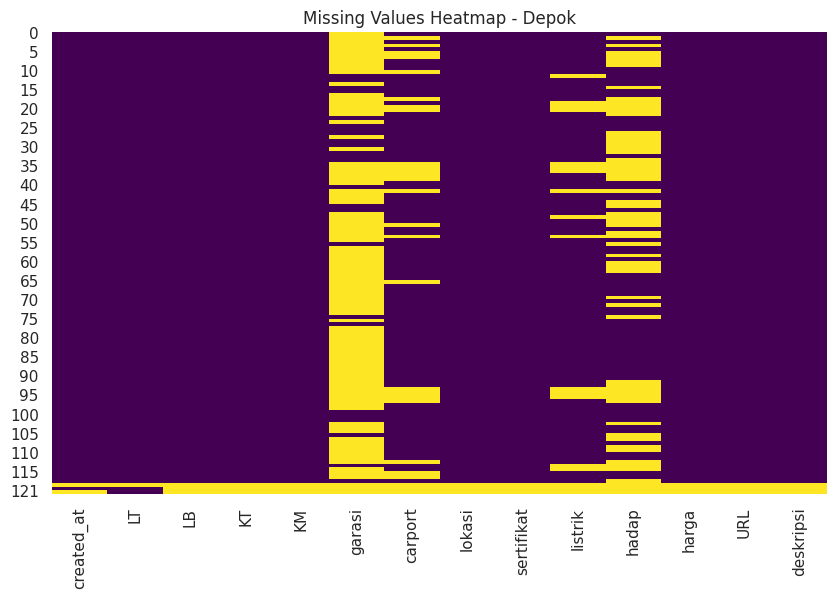

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfD2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Depok')
plt.show()

In [ ]:
# Cek apakah ada nilai non-numerik di kolom 'LT'
print(dfD2['LT'].unique())

['165' '50' '72' '40' '45' '36' '87' '210' '60' '70' '200' '57' '100' '97'
 '112' '84' '75' '487' '378' '400' '77' '1024' '120' '151' '885' '54'
 '249' '76' '66' '79' '78' '105' '63' '62' '71' '92' '96' '65' '104' '110'
 '64' '51' '85' '81' '59' '88' '47' '55' '82' '185' '880' '74' '335' '83'
 '94' '80' nan '- lokasi yang kami gunakan hanya per kecamatan'
 '-harga yang kami gunakan adalah per satuan juta']


In [ ]:
# 1. Mengisi missing values untuk kolom numerik
# Ubah nilai yang salah atau non-numerik menjadi NaN di LT
dfD2['LT'] = pd.to_numeric(dfD2['LT'], errors='coerce')
dfD2['LT'].fillna(dfD2['LT'].mean(), inplace=True)  # Luas Tanah
dfD2['LB'].fillna(dfD2['LB'].mean(), inplace=True)  # Luas Bangunan
dfD2['KT'].fillna(dfD2['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfD2['KM'].fillna(dfD2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfD2['garasi'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada garasi
dfD2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfD2['listrik'].fillna(dfD2['listrik'].mean(), inplace=True)  # Daya listrik

# 2. Mengisi missing values untuk kolom kategorikal
# Tambahkan kategori baru jika tipe data category
dfD2['sertifikat'].fillna(dfD2['sertifikat'].mode()[0], inplace=True)  # Jenis sertifikat
dfD2['hadap'].fillna(dfD2['hadap'].mode()[0], inplace=True)  # Arah menghadap
dfD2['lokasi'].fillna('Tidak diketahui', inplace=True)
dfD2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# 3. Mengisi dengan forward fill untuk kolom waktu
dfD2['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik
dfD2['harga'] = dfD2['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfD2['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Tampilkan DataFrame setelah mengisi missing values

In [ ]:
# Cek Missing Value setelah ditangani dengan imputasi
print("\nCek Missing Values di Data Depok:")
dfD2.isnull().sum()


Cek Missing Values di Data Depok:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


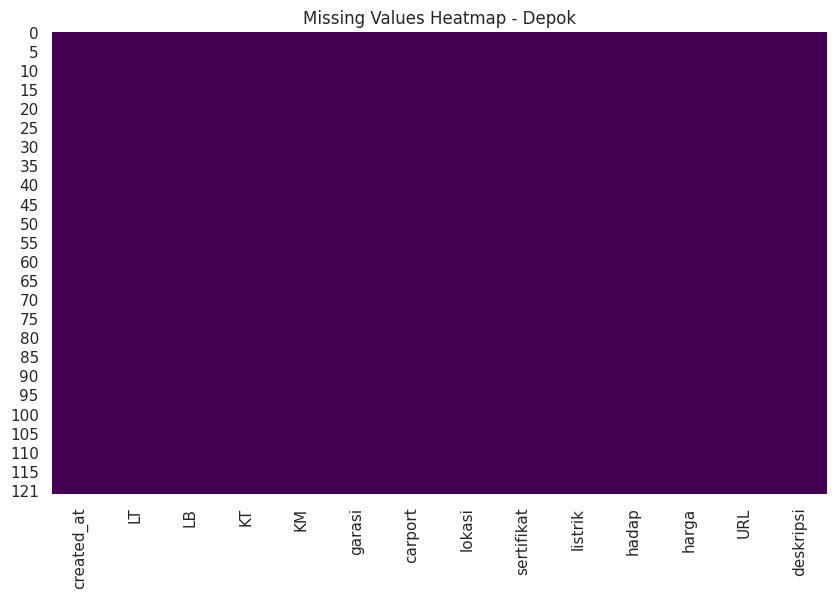

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfD2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Depok')
plt.show()

##### Data Jakarta

In [ ]:
dfJ.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,78
carport,32
lokasi,1
sertifikat,3
listrik,2


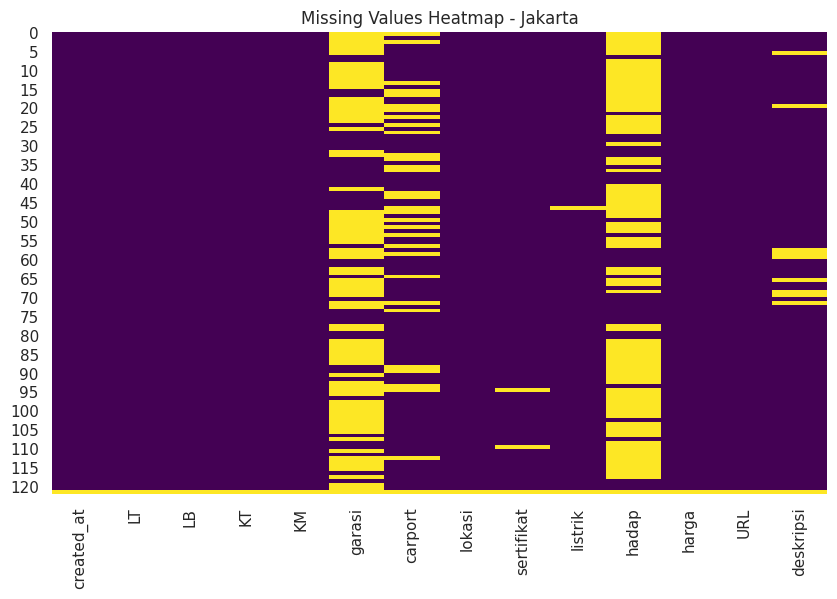

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfJ.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Jakarta')
plt.show()

In [ ]:
# 1. Mengisi missing values untuk kolom numerik
dfJ['LT'].fillna(dfJ['LT'].mean(), inplace=True)  # Luas Tanah
dfJ['LB'].fillna(dfJ['LB'].mean(), inplace=True)  # Luas Bangunan
dfJ['KT'].fillna(dfJ['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfJ['KM'].fillna(dfJ['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfJ['garasi'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada garasi
dfJ['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfJ['listrik'].fillna(dfJ['listrik'].mean(), inplace=True)  # Daya listrik

# Mengisi Missing Value dengan modus
dfJ['sertifikat'].fillna(dfJ['sertifikat'].mode()[0], inplace=True)
dfJ['hadap'].fillna(dfJ['hadap'].mode()[0], inplace=True)
dfJ['lokasi'].fillna(dfJ['lokasi'].mode()[0], inplace=True)
dfJ['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# 3. Mengisi dengan forward fill untuk kolom waktu
dfJ['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik
dfJ['harga'] = dfJ['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfJ['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Tampilkan DataFrame setelah mengisi missing values
print(dfJ)


     created_at          LT          LB   KT   KM  garasi  carport  \
0    06-12-2021  202.000000  198.000000  8.0  3.0     0.0      0.0   
1    02-12-2021   30.000000   55.000000  2.0  1.0     0.0      1.0   
2    06-12-2021   19.000000   35.000000  2.0  1.0     0.0      0.0   
3    06-12-2021   33.000000   42.000000  2.0  2.0     0.0      1.0   
4    06-12-2021   30.000000   55.000000  2.0  2.0     0.0      1.0   
..          ...         ...         ...  ...  ...     ...      ...   
117  06-12-2021   70.000000   57.000000  3.0  2.0     0.0      2.0   
118  06-12-2021  315.000000  280.000000  4.0  3.0     1.0      2.0   
119  06-12-2021  135.000000  190.000000  5.0  5.0     0.0      2.0   
120  06-12-2021  144.000000  250.000000  5.0  5.0     0.0      2.0   
121  06-12-2021  247.586777  279.495868  4.0  3.0     0.0      0.0   

            lokasi sertifikat  listrik    hadap         harga  \
0    Jakarta Pusat        SHM   2200.0    Timur  4.500000e+09   
1    Jakarta Pusat        SHM

In [ ]:
dfJ.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


##### Data Bogor

In [ ]:
# Cek Missing Value
print("\nCek Missing Values di Data Bogor:")
dfB2.isnull().sum()


Cek Missing Values di Data Bogor:


,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,1
carport,1
lokasi,1
sertifikat,1
listrik,1


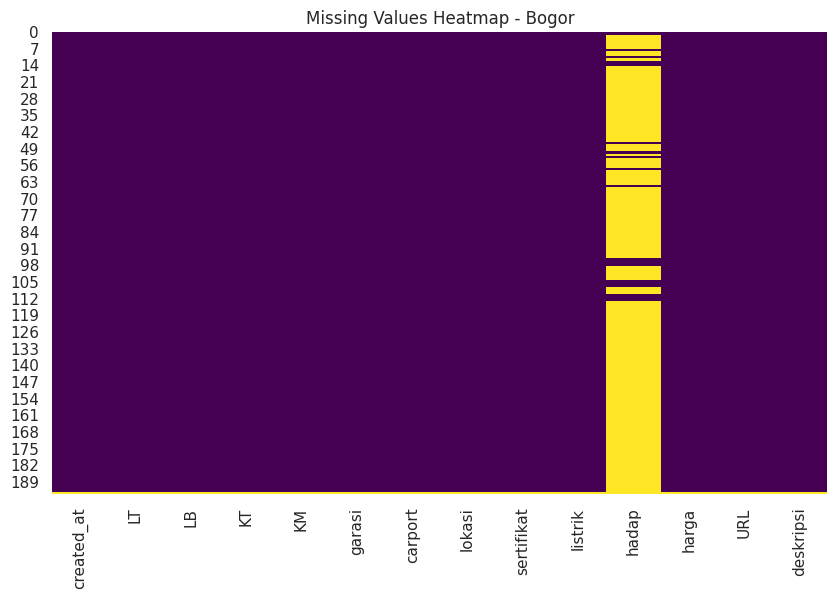

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfB2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Bogor')
plt.show()

In [ ]:
# 1. Mengisi missing values untuk kolom numerik
# Ubah nilai yang salah atau non-numerik menjadi NaN di LT
dfB2['LT'] = pd.to_numeric(dfB2['LT'], errors='coerce')
dfB2['LT'].fillna(dfB2['LT'].mean(), inplace=True)  # Luas Tanah
dfB2['LB'].fillna(dfB2['LB'].mean(), inplace=True)  # Luas Bangunan
dfB2['KT'].fillna(dfB2['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfB2['KM'].fillna(dfB2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfB2['garasi'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada garasi
dfB2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfB2['listrik'].fillna(dfB2['listrik'].mean(), inplace=True)  # Daya listrik

# 2. Mengisi missing values untuk kolom kategorikal
# Tambahkan kategori baru jika tipe data category
dfB2['sertifikat'].fillna(dfB2['sertifikat'].mode()[0], inplace=True)  # Jenis sertifikat
dfB2['hadap'].fillna(dfB2['hadap'].mode()[0], inplace=True)  # Arah menghadap
dfB2['lokasi'].fillna('Tidak diketahui', inplace=True)
dfB2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# 3. Mengisi dengan forward fill untuk kolom waktu
dfB2['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik
dfB2['harga'] = dfB2['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfB2['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Tampilkan DataFrame setelah mengisi missing values
print(dfB2)

     created_at         LT          LB   KT   KM  garasi  carport  \
0    03-12-2021   75.00000   38.000000  2.0  1.0     1.0      1.0   
1    06-12-2021   60.00000   40.000000  1.0  1.0     0.0      1.0   
2    06-12-2021   60.00000   50.000000  2.0  2.0     0.0      1.0   
3    06-12-2021   60.00000   70.000000  3.0  2.0     0.0      1.0   
4    06-12-2021   90.00000   60.000000  3.0  2.0     0.0      2.0   
..          ...        ...         ...  ...  ...     ...      ...   
189  03-12-2021  107.00000   31.000000  2.0  1.0     0.0      1.0   
190  03-12-2021  210.00000  150.000000  4.0  2.0     1.0      1.0   
191  03-12-2021   90.00000   36.000000  2.0  1.0     0.0      1.0   
192  03-12-2021   72.00000   90.000000  3.0  2.0     1.0      1.0   
193  03-12-2021  143.57513   98.663212  2.0  1.0     0.0      0.0   

              lokasi sertifikat      listrik    hadap         harga  \
0         Bojonggede        SHM  1300.000000    Barat  6.925500e+08   
1     Babakan Madang        S

In [ ]:
dfB2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


Terdapat banyak missing value di tiap kota, sehingga kita gunakan metode imputasi yang sesuai untuk masing masing variabel kolom untuk mengisi nilai missing value.

#### Mengubah Tipe Data

##### Data Tangerang

In [ ]:
dfT2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
# Ubah tipe data
dfT2['created_at'] = pd.to_datetime(dfT2['created_at'], format='%d-%m-%Y')
dfT2['lokasi'] = dfT2['lokasi'].astype('category')
dfT2['sertifikat'] = dfT2['sertifikat'].astype('category')
dfT2['hadap'] = dfT2['hadap'].astype('category')
dfT2['LT'] = dfT2['LT'].astype('int')
dfT2['LB'] = dfT2['LB'].astype('int')
dfT2['KM'] = dfT2['KM'].astype('int')
dfT2['KT'] = dfT2['KT'].astype('int')
dfT2['garasi'] = dfT2['garasi'].astype('int')
dfT2['carport'] = dfT2['carport'].astype('int')
dfT2['listrik'] = dfT2['listrik'].astype('int')
dfT2['harga'] = dfT2['harga'].astype('int')

In [ ]:
dfT2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


##### Data Bekasi

In [ ]:
dfX2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
# Ubah tipe data
dfX2['created_at'] = pd.to_datetime(dfX2['created_at'], format='%d-%m-%Y')
dfX2['lokasi'] = dfX2['lokasi'].astype('category')
dfX2['sertifikat'] = dfX2['sertifikat'].astype('category')
dfX2['hadap'] = dfX2['hadap'].astype('category')
dfX2['LT'] = dfX2['LT'].astype('int')
dfX2['LB'] = dfX2['LB'].astype('int')
dfX2['KM'] = dfX2['KM'].astype('int')
dfX2['KT'] = dfX2['KT'].astype('int')
dfX2['garasi'] = dfX2['garasi'].astype('int')
dfX2['carport'] = dfX2['carport'].astype('int')
dfX2['listrik'] = dfX2['listrik'].astype('int')
dfX2['harga'] = dfX2['harga'].astype('int')

In [ ]:
dfX2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


##### Data Depok

In [ ]:
dfD2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
# Ubah tipe data
dfD2['created_at'] = pd.to_datetime(dfD2['created_at'], format='%d-%m-%Y', errors='coerce')
# Mengubah nilai pada kolom 'LT' menjadi numerik, nilai tidak valid diubah menjadi NaN
#dfD2['LT'] = pd.to_numeric(dfD2['LT'], errors='coerce')
dfD2['LT'] = dfD2['LT'].astype('int64')
dfD2['LB'] = dfD2['LB'].astype('int64')
dfD2['KT'] = dfD2['KT'].astype('int64')
dfD2['KM'] = dfD2['KM'].astype('int64')
dfD2['garasi'] = dfD2['garasi'].astype('int64')
dfD2['carport'] = dfD2['carport'].astype('int64')
dfD2['listrik'] = dfD2['listrik'].astype('int64')
dfD2['harga'] = dfD2['harga'].astype('int64')
dfD2['lokasi'] = dfD2['lokasi'].astype('category')
dfD2['sertifikat'] = dfD2['sertifikat'].astype('category')
dfD2['hadap'] = dfD2['hadap'].astype('category')
dfD2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


In [ ]:
dfD2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


##### Data Jakarta

In [ ]:
# Ubah tipe data
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'], format='%d-%m-%Y')
dfJ['lokasi'] = dfJ['lokasi'].astype('category')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')
dfJ['LT'] = dfJ['LT'].astype('int')
dfJ['LB'] = dfJ['LB'].astype('int')
dfJ['KM'] = dfJ['KM'].astype('int')
dfJ['KT'] = dfJ['KT'].astype('int')
dfJ['garasi'] = dfJ['garasi'].astype('int')
dfJ['carport'] = dfJ['carport'].astype('int')
dfJ['listrik'] = dfJ['listrik'].astype('int')
dfJ['harga'] = dfJ['harga'].astype('int')
dfJ.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


##### Data Bogor

In [ ]:
dfB2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
# Ubah tipe data
dfT2['created_at'] = pd.to_datetime(dfT2['created_at'], format='%d-%m-%Y')
dfT2['lokasi'] = dfT2['lokasi'].astype('category')
dfT2['sertifikat'] = dfT2['sertifikat'].astype('category')
dfT2['hadap'] = dfT2['hadap'].astype('category')
dfT2['LT'] = dfT2['LT'].astype('int')
dfT2['LB'] = dfT2['LB'].astype('int')
dfT2['KM'] = dfT2['KM'].astype('int')
dfT2['KT'] = dfT2['KT'].astype('int')
dfT2['garasi'] = dfT2['garasi'].astype('int')
dfT2['carport'] = dfT2['carport'].astype('int')
dfT2['listrik'] = dfT2['listrik'].astype('int')
dfT2['harga'] = dfT2['harga'].astype('int')


In [ ]:
dfB2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


#### Mengubah Satuan Harga

##### Data Tangerang

In [ ]:
harga_tangerang = dfT2[['harga']]
print(harga_tangerang)

     harga
0      500
1      480
2      600
3     4250
4     1700
..     ...
120    850
121   1860
122   1800
123   1000
124   1000

[125 rows x 1 columns]


In [ ]:
dfT2['harga'] = dfT2['harga'] * 1000000

In [ ]:
harga_tangerang = dfT2[['harga']]
print(harga_tangerang)

          harga
0     500000000
1     480000000
2     600000000
3    4250000000
4    1700000000
..          ...
120   850000000
121  1860000000
122  1800000000
123  1000000000
124  1000000000

[125 rows x 1 columns]


In [ ]:
dfT2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-06-12,60,50,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300,Selatan,500000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72,54,2,1,1,1,"CISAUK, TANGERANG",SHM,1300,Utara,480000000,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60,48,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200,Utara,600000000,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200,225,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,Utara,4250000000,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76,123,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200,Utara,1700000000,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-08-12,66,70,3,2,0,1,"Ciater, Tangerang",SHM,1300,Utara,850000000,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202,85,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200,Barat,1860000000,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108,130,3,3,1,1,"Pagedangan, Tangerang",SHM,2200,Utara,1800000000,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,2021-08-12,91,91,3,2,0,0,"Poris, Tangerang",SHM,3500,Utara,1000000000,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


##### Data Depok

In [ ]:
harga_depok = dfD2[['harga']]
print(harga_depok)

     harga
0     2100
1      250
2      250
3      250
4      350
..     ...
116    185
117   1750
118   1750
120   1750
121   1750

[121 rows x 1 columns]


In [ ]:
dfD2['harga'] = dfD2['harga'] * 1000000

In [ ]:
harga_depok = dfD2[['harga']]
print(harga_depok)

          harga
0    2100000000
1     250000000
2     250000000
3     250000000
4     350000000
..          ...
116   185000000
117  1750000000
118  1750000000
120  1750000000
121  1750000000

[121 rows x 1 columns]


In [ ]:
dfD2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,165,200,4,2,0,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,2021-12-06,50,45,2,1,0,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36,2,1,0,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45,2,1,0,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45,2,1,0,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-12-04,50,50,2,1,0,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,2021-12-04,100,15,3,3,1,1,Cinere,SHM,3500,Utara,1750000000,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,2021-12-04,119,92,3,2,0,0,Tidak diketahui,SHM,2147,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi
120,NaT,119,92,3,2,0,0,Tidak diketahui,SHM,2147,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi


####Noise dan Outlier

##### Data Tangerang

In [ ]:
# Mengecek noise dengan melihat distribusi dari data kategorik
dfT2['lokasi'].value_counts()


,count
lokasi,
"BSD, TANGERANG",28
"BSD CITY, TANGERANG",21
"GADING SERPONG, TANGERANG",8
"CISAUK, TANGERANG",8
"BSD THE ICON, TANGERANG",6
"CILEDUG, TANGERANG",3
"PONDOK CABE, TANGERANG",3
"LIPPO KARAWACI, TANGERANG",3
"CIPONDOH, TANGERANG",3


In [ ]:
dfT2['hadap'].value_counts()

,count
hadap,
Utara,94
Selatan,12
Timur,7
Barat,4
Tenggara,4
Timur Laut,3
Barat Daya,1


In [ ]:
dfT2['sertifikat'].value_counts()

,count
sertifikat,
SHM,99
"lainnya(PPJB, GIRIK, ADAT, dll)",15
HGB,11


In [ ]:
# Mengecek noise
dfT2['created_at'].value_counts()

,count
created_at,
2021-06-12,102
2021-08-12,13
2021-07-12,10


In [ ]:
dfT2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/properti/tangerang/hos9276294/,1
https://www.rumah123.com/properti/tangerang/hos9290589/,1
https://www.rumah123.com/properti/tangerang/hos9290575/,1
https://www.rumah123.com/properti/tangerang/hos9290577/,1
https://www.rumah123.com/properti/tangerang/hos9290610/,1
...,...
https://www.rumah123.com/properti/tangerang/hos9292234/,1
https://www.rumah123.com/properti/tangerang/hos9292456/,1
https://www.rumah123.com/properti/tangerang/hos9292736/,1


In [ ]:
dfT2['deskripsi'].value_counts()

,count
deskripsi,
"Dekat dengan berbagai fasilitas seperti :\nSekolah Negeri dan Swasta, Kampus, Tempat ibadah, Rumah sakit, Pusat perbelanjaan, Stasiun, Pintu tol\nMore info :\n0821 3494 3xxx RN\n0821 1238 5xxx LH",8
"Dekat dengan berbagai fasilitas seperti : Sekolah Negeri dan Swasta, Kampus, Tempat ibadah, Rumah sakit, Pusat perbelanjaan, Stasiun, Pintu tol. More info : 0821 3494 3xxx RN, 0821 1238 5xxx LH",6
"Hi Direct Buyer...\nDijual Rumah The Icon BSD City\nSpesifikasi: Lt 128 m2 ( 8 x 18 ), Lb 88 m2, Kt 3+1, Km 3+1, Posisi Badan, Hadap Selatan, Surat PPJB, Harga 2.2M Nego\n",2
"Rumah 2 Lantai Akses Strategis, Keamanan 24jam,One gate system. Memiliki fasilitas terdekat yaitu,15 Menit Stasiun rawa buntu,10 Menit Stasiun sudimara, 5 Menit Tol BSD Tol Jorr, 15 Menit Mall AEON, 10 Menit Rs Eka Hospital, 3 Menit RSIA BUAH HATI, 3 Menit RS permata pamulang, 8 Menit RSUD TANGSEL, 5 Menit Kantor WALIKOTA, Akses zonasi sekolah SMAN 2 TANGSEL",1
"Rumah Dijual Tangerang, Rumah Sangat Asri dan dalam Komp Griya Loka Bsd Lama yang Sangat Mudah di Jangkau Kendaraan Umum Dekat Halte Busway dan Pertokoan, Rumah Sakit.\n",1
...,...
"Spec : LT 184 MÂ², LB +/- 125 MÂ², KT 3+1, KM 2+1, SHM, Hadap Barat, Bentuk Tanah lebar di belakang, Depan Taman, Lantai Roman Granite 60x120, Kitchen set, Strategis dekat Toll & Pasar Modern BSD, Harga--> 1.95 Nett, Hub. : IRMA - MB PRO BSD 085716434xxx",1
"The Green Cluster Manhattan Forum, Lt 385 LB 380 kt 5+1 km 5+1, Surat HGB, Harga 6,2 M NEGO, Turun jadi 5,9M, HubungiNovie Realita - Era Fiesta 0812 90537725",1
"Dijual cepat rumah standar di Delatinos BSD. Posisi di boulevard cluster, 2 jalur. Lingkungan cluster dengan keamanan 24 jam dan dilengkapi dengan berbagai fasilitas seperti sport center (Kolam renang, lapangan tenis, tempat gym), jogging track dan komersial area. Lokasi strategis dekat dengan pintu tol BSD, stasiun kereta api (rawa buntu). 15 menit ke The Breeze, AEON Mall dan ICE BSD. 10 menit ke Eka Hospital, Sekolah dan Perbankan, 15 menit ke pasar modern BSD. Berikut spesifikasinya:\nLt / Lb : 128 / 90, Kt / Km : 2 / 1, Surat SHM, Harga Rp. 1.65 Milyar Nego\nMore Detail:\nLinda - Ray White Serpong BSD\n081315293xxx",1


Batas bawah: -3125000000.0
Batas atas: 7875000000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
120    True
121    True
122    True
123    True
124    True
Name: harga, Length: 125, dtype: bool


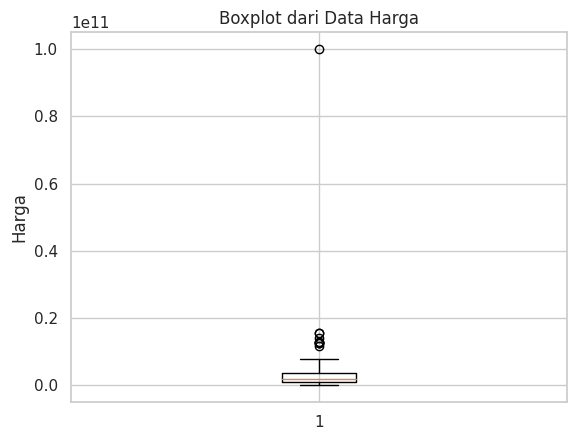

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfT2['harga'].quantile(0.25)
Q3 = dfT2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfT2["harga"] >= Q1 - 1.5 * IQR) & (dfT2["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfT2_bukan_outlier = dfT2[bukan_outlier]

# Creating DataFrame With Outliers
dfT2_outlier = dfT2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfT2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [ ]:
dfT2_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-06-12,60,50,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300,Selatan,500000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72,54,2,1,1,1,"CISAUK, TANGERANG",SHM,1300,Utara,480000000,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60,48,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200,Utara,600000000,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200,225,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,Utara,4250000000,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76,123,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200,Utara,1700000000,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-08-12,66,70,3,2,0,1,"Ciater, Tangerang",SHM,1300,Utara,850000000,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202,85,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200,Barat,1860000000,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108,130,3,3,1,1,"Pagedangan, Tangerang",SHM,2200,Utara,1800000000,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,2021-08-12,91,91,3,2,0,0,"Poris, Tangerang",SHM,3500,Utara,1000000000,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
20,2021-06-12,276,441,4,4,2,2,"BSD CITY, TANGERANG",SHM,11000,Timur Laut,13000000000,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...
32,2021-06-12,534,1000,5,6,6,2,"BSD, TANGERANG",SHM,16500,Utara,15500000000,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
47,2021-06-12,625,500,5,3,0,2,"BSD, TANGERANG",SHM,5500,Utara,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek..."
49,2021-06-12,534,1000,8,8,6,6,"BSD, TANGERANG",SHM,16500,Utara,15500000000,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
54,2021-06-12,474,500,6,5,4,2,"BSD DE PARK, TANGERANG",SHM,23000,Utara,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
66,2021-06-12,276,441,4,4,0,0,"BSD FORESTA, TANGERANG",SHM,3962,Utara,14000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
67,2021-06-12,276,441,5,5,0,0,"BSD CITY, TANGERANG",HGB,3500,Utara,12600000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter..."
76,2021-06-12,230,370,4,4,0,0,"CISAUK, TANGERANG",HGB,3500,Utara,11600000000,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...
100,2021-06-12,3087,2500,5,5,10,10,"BSD BUKIT GOLF, TANGERANG",SHM,66000,Utara,100000000000,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...
114,2021-08-12,276,441,4,4,4,4,"BSD, TANGERANG",SHM,11000,Utara,13000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...


##### Data Bekasi

In [ ]:
# Mengecek noise dengan melihat distribusi dari data kategorik
dfX2['lokasi'].value_counts()

,count
lokasi,
Kota Bekasi,74
Kabupaten Bekasi,34


In [ ]:
dfX2['sertifikat'].value_counts()

,count
sertifikat,
SHM,97
HGB,9
"SHM,IMB",2


In [ ]:
dfX2['hadap'].value_counts()

,count
hadap,
Selatan,83
Timur,16
Utara,5
Barat,4


In [ ]:
# Mengecek noise
dfX2['created_at'].value_counts()

,count
created_at,
2021-12-06,30
2021-12-04,19
2021-12-05,15
2021-12-03,15
2021-12-01,12
2021-12-02,8
2021-12-08,7
2021-12-07,2


In [ ]:
dfX2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/properti/bekasi/hos9260776/,2
https://www.rumah123.com/properti/bekasi/hos9285927/,2
https://www.rumah123.com/properti/bekasi/hos9251067/,2
Rumah murah di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840087312 (olx.co.id),1
https://www.rumah123.com/properti/bekasi/hos9275823/,1
...,...
https://www.rumah123.com/properti/bekasi/hos9291411/,1
https://www.99.co/id/properti/rumah-mewah-harga-murah-3-lantai-fully-furnished-di-perumahan-terbaik-di-area-jatibening-bekasi-83923536687,1
https://www.99.co/id/properti/rumah-siap-huni-di-green-ara-residence-harapan-indah-bekasi-67686580144,1


In [ ]:
dfX2['deskripsi'].value_counts()

,count
deskripsi,
"Dijual cepat Rumah cantik rapih siap huni di bulevar hijau harapan indah bekasi Hunian aman nyaman dan asri Dekat ke sport club,hotel santika premier, eka hospital, pom bensin , sekolah. Harga nego",2
"Selangkah ke stasiun krl telaga murni, Dekat dengan kawasan industri mm 2100, gobel, jababeka, ejip dan tol baru yaitu toll jorr 2 cilincing dan cimanggis,segera dibangun mall di dalam kawasan metland cibitung, dekat dengan rs. hermina yang berada di dalam kawasan metland cibitung, sistem keamanan 24 jam cctv, air bersih dan kencang wtp aetra, listrik token 1300watt, dan di kelola oleh badan pengelola lingkungan bpl kebersihan terpadu",1
"Di lelang Tidak Bergerak, Tanah berikut bangunan, Lokasi : Blok / No. Kav : RA 15-3 (setempat dikenal dengan Perumahan Harvest City, Cluster Rosemary, Kode Pos 17320 Blok RA 15 No. 03), Desa Cikarageman, Kecamatan Setu, Kabupaten Bekasi, Provinsi Jawa Barat.",1
"Selling Point : Dekat Kota Cinema Mall Jatiasih, dekat Trisakti Ciangsana dan Mercu Buana, dekat bandara Halim Perdana Kusuma, dekat Trans Studio Mall dan TMII, dekat RS Jatisampurna dan Mitra Keluarga Jatiasih, dekat pintu tol Jorr Jatiasih, Fasilitas Cluster : Full Basketball Court, swimming Pool + Kids Pool, flower Garden, outdoor Gym, children Playground, traditional Gamesfield, jogging Track, keamanan 24Jam + CCTV, underground Utility, Spesifikasi : Luas tanah 72, luas bangunan 60, kamar tidur 3, kamar mandi 2, carport 2 mobil, air PDAM, listrik 2200 watt, harga mulai 1,033 M (cash)",1
"Lokasi strategis dekat Sumarecon stasiun Bekasi, akses ke arah Tol Bekasi Barat, harapan indah Cakung pulogadung",1
...,...
"Di lelang Tidak Bergerak, Tanah berikut bangunan, SHM NO. 2400, tanggal 2 Juli 2015, Luas : 153 m2, Lokasi : Perumahan Metland Tambun Cluster The Platinum Type Gold, Blok J 2 No. 5 Desa Cibuntu, Kec. Cibitung Kab. Bekasi, Provinsi Jawa Barat",1
"Jual cepat rumah mewah harga murah , 3 Lantai, Fully Furnished di Perumahan Terbaik di area Jatibening, Bekasi. Open Price 4,5 M. - Nego sampai deal!, Details : Lt/Lb : 200/293, Bedrooms : 6, Bathrooms : 4, Daya Listrik : 5.500 Watt, Garasi mobil : 1 Mobil, Carport : 1 Mobil, Kondisi : Fully Furnished, Sertifikat : IMB SHM, Fasilitas di Kompleks Perumahan: Swimming Pool, Jogging Track, Lapangan Tennis, Barbeque Park, Security 24 jam",1
"Rumah cantik sangat siap huni dg kondisi terawat, Rumah 2 lantai, Hadap Utara di Cluster Balsa, rumah sudah full renovasi dan semi furnished tinggal bawa koper saja harga di bawah harga pasar, ROW jalan besar. Sertifikat Hak Milik, Bonus AC Gordyn Kitchen set, Listrik 2.200 VA, Cash atau KPR bisa dibantu",1


Batas bawah: -603125000.0
Batas atas: 2521875000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
103    True
104    True
105    True
106    True
107    True
Name: harga, Length: 108, dtype: bool


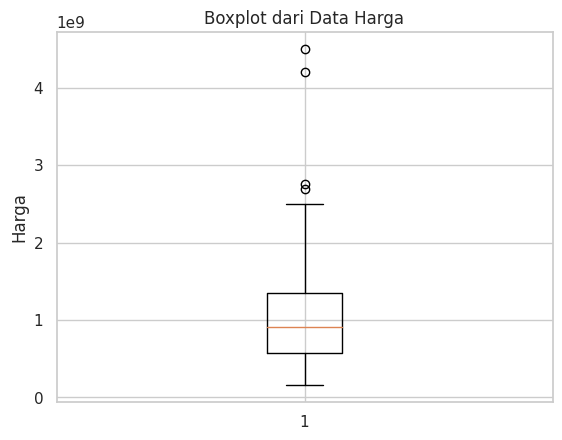

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfX2['harga'].quantile(0.25)
Q3 = dfX2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfX2["harga"] >= Q1 - 1.5 * IQR) & (dfX2["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfX2_bukan_outlier = dfX2[bukan_outlier]

# Creating DataFrame With Outliers
dfX2_outlier = dfX2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfX2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [ ]:
dfX2_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-08,71,43,2,1,0,1,Kabupaten Bekasi,SHM,1300,Selatan,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,2021-12-08,59,60,2,1,0,1,Kabupaten Bekasi,SHM,2056,Selatan,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,2021-12-08,124,95,2,1,0,1,Kabupaten Bekasi,SHM,2056,Selatan,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,2021-12-08,144,100,2,1,0,1,Kabupaten Bekasi,SHM,2200,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,2021-12-08,108,100,3,2,0,1,Kabupaten Bekasi,SHM,2200,Timur,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-12-01,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,2021-12-01,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,Selatan,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,2021-12-01,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300,Timur,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,2021-12-01,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,Selatan,250000000,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [ ]:
dfX2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
7,2021-12-07,336,200,4,3,0,1,Kabupaten Bekasi,HGB,5500,Selatan,4200000000,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,2021-12-06,245,117,3,2,0,0,Kota Bekasi,SHM,2200,Timur,2750000000,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,2021-12-06,200,293,6,4,1,1,Kota Bekasi,SHM,5500,Selatan,4500000000,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,2021-12-01,144,180,4,3,0,2,Kota Bekasi,SHM,4400,Selatan,2690000000,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...


##### Data Depok

In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfD2['lokasi'].value_counts()

,count
lokasi,
Sawangan,30
Cimanggis,25
Cinere,12
Tapos,12
Cipayung,9
Pancoran Mas,9
Sukmajaya,9
Beji,5
Cilodong,3


In [ ]:
dfD2['hadap'].value_counts()

,count
hadap,
Utara,78
Barat,15
Timur,15
Selatan,11
Barat Daya,1
Timur Laut,1


In [ ]:
dfD2['sertifikat'].value_counts()

,count
sertifikat,
SHM,119
Lainnya,2


In [ ]:
# Mengecek noise
dfD2['created_at'].value_counts()

,count
created_at,
2021-12-05,74
2021-12-04,23
2021-12-06,22


In [ ]:
dfD2['URL'].value_counts()

,count
URL,
URL tidak tersedia,3
https://www.rumah123.com/properti/depok/hos9284003/,1
https://www.rumah123.com/properti/depok/hos9283677/,1
https://www.rumah123.com/properti/depok/hos9283706/,1
https://www.rumah123.com/properti/depok/hos9283934/,1
...,...
https://www.rumah123.com/properti/depok/hos9286036/,1
https://www.rumah123.com/properti/depok/hos9286089/,1
https://www.rumah123.com/properti/depok/hos9286163/,1


In [ ]:
dfD2['deskripsi'].value_counts()

,count
deskripsi,
Rumah Murah Dekat Stasiun dan Tol di Depok Sawangan.,4
Rumah Cluster Siap Huni Depok,4
Rumah 2 Lantai 2 Bangunan Gaya Art Deco di Kota Mandiri Baru,4
Tidak ada deskripsi,3
CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,3
...,...
Rumah Baru 2 Lantai Siap Huni di Sawangan Depok,1
"Rumah dijual Murah Promo tanpa dp,Angsuran Ringan Dekat Gerbang Tol sawangan Depok",1
Cluster cantik cinangka pondok cabe harga all in biaya surat2,1


Batas bawah: -587500000.0
Batas atas: 2272500000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
120    True
121    True
Name: harga, Length: 121, dtype: bool


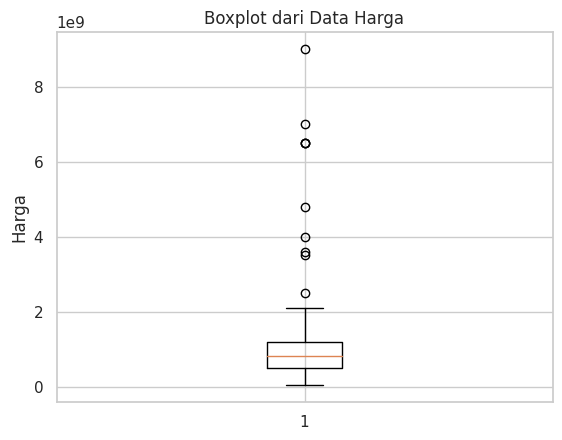

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfD2['harga'].quantile(0.25)
Q3 = dfD2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfD2["harga"] >= Q1 - 1.5 * IQR) & (dfD2["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfD2_bukan_outlier = dfD2[bukan_outlier]

# Creating DataFrame With Outliers
dfD2_outlier = dfD2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfD2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [ ]:
dfD2_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,165,200,4,2,0,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,2021-12-06,50,45,2,1,0,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36,2,1,0,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45,2,1,0,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45,2,1,0,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-12-04,50,50,2,1,0,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,2021-12-04,100,15,3,3,1,1,Cinere,SHM,3500,Utara,1750000000,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,2021-12-04,119,92,3,2,0,0,Tidak diketahui,SHM,2147,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi
120,NaT,119,92,3,2,0,0,Tidak diketahui,SHM,2147,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi


In [ ]:
dfD2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
23,2021-12-05,487,450,6,3,0,5,Pancoran Mas,SHM,2200,Utara,4000000000,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,2021-12-05,378,289,4,4,3,3,Sukmajaya,SHM,5500,Timur Laut,7000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,2021-12-05,400,226,5,4,2,1,Cinere,SHM,2200,Selatan,3600000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,2021-12-05,1024,400,7,5,6,6,Limo,SHM,4400,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...
29,2021-12-05,1024,400,7,5,6,6,Cinere,SHM,5500,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,2021-12-05,151,180,3,3,1,1,Pancoran Mas,SHM,2200,Selatan,3500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,2021-12-05,885,600,7,4,2,2,Cimanggis,SHM,6600,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
38,2021-12-05,249,260,3,2,0,0,Bojong Sari,Lainnya,2200,Utara,2500000000,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok
103,2021-12-04,880,400,5,1,0,7,Cinere,SHM,3300,Selatan,9000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...
105,2021-12-04,335,300,4,3,2,2,Cinere,SHM,10000,Utara,4800000000,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...


##### Data Jakarta

In [ ]:
dfJ['lokasi'].value_counts()

,count
lokasi,
Jakarta Barat,26
Jakarta Utara,25
Jakarta Selatan,24
Jakarta Timur,24
Jakarta Pusat,23


In [ ]:
dfJ['hadap'].value_counts()

,count
hadap,
Timur,96
Utara,10
Selatan,5
Barat,4
timur,2
Barat & Selatan,1
Selatan & Barat,1
Timur Laut,1
selatan,1


In [ ]:
dfJ['sertifikat'].value_counts()

,count
sertifikat,
SHM,93
SHM + IMB,11
SHGB,8
PPJB,7
AJB,1
SHM + Hak Pakai,1
SHM + IMB + PBB,1


In [ ]:
dfJ['created_at'].value_counts()

,count
created_at,
2021-12-06,42
2021-12-07,14
2021-12-05,12
2021-12-02,8
2021-11-06,7
2021-11-22,7
2021-11-29,6
2021-12-04,4
2021-12-03,4


In [ ]:
dfJ['URL'].value_counts()

,count
URL,
https://www.rumah.com/listing-properti/dijual-rumah-bangunan-baru-di-kalideres-permai-cengkareng-jakarta-barat-oleh-fransisca-ferra-jong-19021419,2
https://www.rumah.com/listing-properti/dijual-joglo-jakarta-barat-oleh-sari-19270742,1
https://www.rumah.com/listing-properti/dijual-sunter-jakarta-utara-oleh-iin-maria-19238295,1
https://www.rumah.com/listing-properti/dijual-sunter-jakarta-utara-oleh-iin-maria-19274386,1
https://www.rumah.com/listing-properti/dijual-koja-jakarta-utara-oleh-hera-18409487,1
...,...
https://rumahdijual.com/tebet/11748387-jual-rumah-luas-kawasan-menteng-dalam-jakarta-selatan.html,1
https://rumahdijual.com/tebet/8555409-dijual-rumah-tebet-timur-brand-new-tahap-finishing-lokasi.html,1
https://rumahdijual.com/tebet/10851049-rmh-mewah-2-lt-siap-huni-semi-furnish-bbs.html,1


In [ ]:
dfJ['deskripsi'].value_counts()

,count
deskripsi,
Tidak ada deskripsi,10
Dekat Cikini Salemba Taman Isamail Marzuki Kampus Universitas Indonesia UI YAI RSCM dan RS. PGI Cikini,1
- Kondisi di HOOK\n- Kondisi masih Tersewa smp Agustus 2019\n- Biaya sewa akan diperhitungkan\n- Kolam Renang di belakang\n- Tempat bermain anak2 disamping\n- Ada tempat Ruangan istirahat disebelah luas sekali,1
Dijual Cepat Rumah Koja Di Jakarta Utara Dng Luas 15 X 25 M2,1
"Rumah Bagus Strategis di Sunter DKI Jakarta Utara, dengan pendingin ruangan, balkon, pemadangan hijau/taman, dan lantai atas",1
...,...
"- Baru, pembangunan sudah 80%\n- Beranda dan pagar penuh\n- Lantai Granite\n- Air Jetpump",1
- Ruang Musik\n- Kitchen set ( dapur kotor dan bersih)\n- Lokasi dekat dengan mushola dan masjid Al-Itihad\n- Bebas banjir dan penjagaan satpam 24 jam,1
"- Bangunan 4 lantai\n- Semi furnished unit 8AC, 3 Wardrobe, 2 Kitchen\n- 2 kolam renang, gym/fitness, playground, basketball court, rooftop",1


Batas bawah: -6569250000.0
Batas atas: 15248750000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
117    True
118    True
119    True
120    True
121    True
Name: harga, Length: 122, dtype: bool


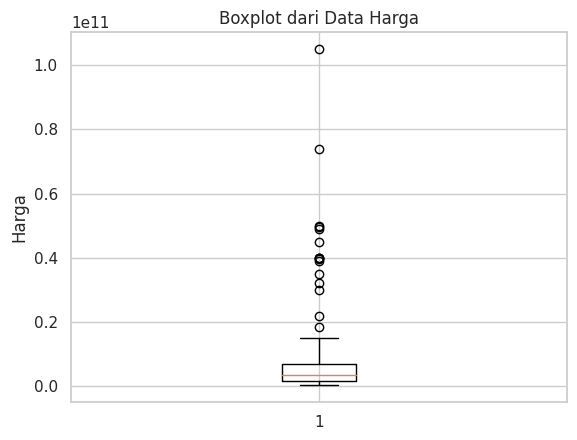

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfJ['harga'].quantile(0.25)
Q3 = dfJ['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfJ["harga"] >= Q1 - 1.5 * IQR) & (dfJ["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfJ_bukan_outlier = dfJ[bukan_outlier]

# Creating DataFrame With Outliers
dfJ_outlier = dfJ[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfJ['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [ ]:
dfJ_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,Timur,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,Timur,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,Timur,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,Timur,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,Timur,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-12-06,70,57,3,2,0,2,Jakarta Timur,SHM,2200,Timur,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-12-06,315,280,4,3,1,2,Jakarta Timur,SHM + IMB,3500,Timur,4300000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135,190,5,5,0,2,Jakarta Timur,SHM + IMB,2200,Selatan,3400000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,2021-12-06,144,250,5,5,0,2,Jakarta Timur,SHM,3500,Timur,2250000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [ ]:
dfJ_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
6,2021-12-06,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000,Timur,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,2021-12-06,597,700,5,4,2,5,Jakarta Pusat,SHM,8000,Timur,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
17,2021-12-05,652,405,5,4,0,4,Jakarta Pusat,SHM,6600,Timur,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
18,2021-12-05,840,800,5,3,0,8,Jakarta Pusat,SHGB,6600,Timur,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
21,2021-12-07,700,2000,10,10,0,10,Jakarta Pusat,SHM,66000,Utara,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
34,2021-12-06,485,550,3,5,1,1,Jakarta Selatan,SHM + IMB,18000,Timur,22000000000,https://rumahdijual.com/tebet/10851049-rmh-mew...,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
40,2021-12-06,612,485,5,4,1,2,Jakarta Selatan,SHM,13000,Timur,18500000000,https://rumahdijual.com/jakarta-selatan/112558...,- Lantai Bawah : Master Bed Room dengan kamar ...
41,2021-12-06,790,700,6,6,0,6,Jakarta Selatan,SHM,7700,Timur,32000000000,https://rumahdijual.com/jakarta-selatan/110122...,Ada kolam renang
42,2021-12-05,950,1400,6,4,7,0,Jakarta Selatan,SHM,23000,Timur,49000000000,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
44,2021-12-07,738,500,5,3,2,2,Jakarta Selatan,SHM + IMB,13200,Timur,74000000000,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...


##### Data Bogor

In [ ]:
# Mengecek noise dengan melihat distribusi dari data kategorik
dfB2['lokasi'].value_counts()

,count
lokasi,
Gunung Putri,26
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Cileungsi,11
Bogor Utara,11
Jonggol,7


In [ ]:
dfB2['hadap'].value_counts()

,count
hadap,
Selatan,180
Timur,5
Barat,3
Utara,3
"Timur, Utara",1
"Selatan, Utara",1
Danau,1


In [ ]:
dfB2['sertifikat'].value_counts()

,count
sertifikat,
SHM,156
SHGB,33
Lainnya,5


In [ ]:
# Mengecek noise
dfB2['created_at'].value_counts()

,count
created_at,
06-12-2021,52
07-12-2021,40
03-12-2021,22
02-12-2021,20
01-12-2021,20
04-12-2021,20
05-12-2021,20


In [ ]:
dfB2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/,6
https://www.rumah.com/listing-properti/dijual-permata-nusa-indah-situsari-cileungsi-bogor-oleh-agus-rohman-17221797,2
https://www.rumah.com/listing-properti/dijual-kemang-eminence-bogor-oleh-aditya-santoso-19253196,2
https://www.rumah.com/listing-properti/dijual-promo-murah-cluster-missiissippi-kota-wisata-cibubur-oleh-rahadiyanuar-zaini-19353497,1
https://www.rumah.com/listing-properti/dijual-rumah-takeover-dekat-stasiun-cilebut-bogor-oleh-agus-razali-19269369,1
...,...
https://www.rumah.com/listing-properti/dijual-taman-darul-adnen-ciangsana-gunung-putri-bogor-oleh-muhammad-faqihuddin-19329327,1
https://www.rumah.com/listing-properti/dijual-grand-parung-oleh-esa-husnul-19372482,1
https://www.rumah.com/listing-properti/dijual-metro-parung-oleh-esa-husnul-19372448,1


In [ ]:
dfB2['deskripsi'].value_counts()

,count
deskripsi,
"Destinasi menarik di kawasan Babakan Madang; Gunung Pancar, Taman Budaya, Babakan Madang Highland, JungleLand, Stadion Pakansari, Leuwi Hejo",6
"Lokasi strategis, Fasilitas lengkap",4
"Fasilitas masjid, taman, jogging track, keamanan",4
Dekat tol dan stasiun LRT,3
Villa bogor indah 6,3
...,...
"Perumahan dengan akad syariah, dekat dengan Tol Cimanggis, Rumah Sakit Permata, sekolah, mall, dan pusat kuliner",1
"Keamanan 24 jam, dekat dengan Tol Citeureup, sekolah, Rumah Sakit Annisa dan Centra Medika",1
"Terdapat ruang terbuka hijau, dekat dengan pasar tradisional",1


Batas bawah: -876875000.0
Batas atas: 2526125000.0

Outliers:
0       True
1       True
2       True
3       True
4       True
       ...  
994    False
995    False
996    False
997    False
998    False
Name: harga, Length: 999, dtype: bool


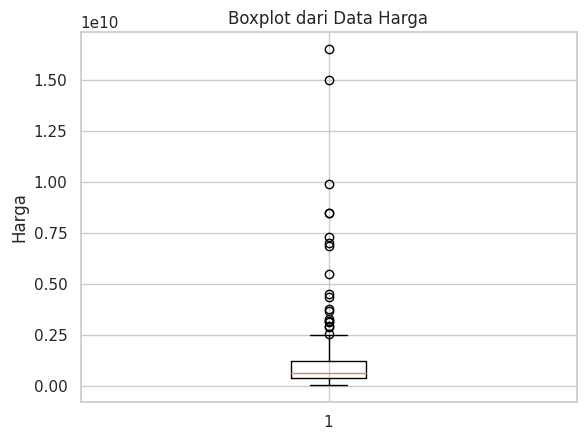

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfB2['harga'].quantile(0.25)
Q3 = dfB2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfB["harga"] >= Q1 - 1.5 * IQR) & (dfB["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfB2_bukan_outlier = dfB2[bukan_outlier]

# Creating DataFrame With Outliers
dfB2_outlier = dfB2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfB2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [ ]:
dfB2_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,Selatan,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,Selatan,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,Selatan,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,Selatan,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,Selatan,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,Selatan,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,Selatan,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,Selatan,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"


In [ ]:
dfB2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
26,06-12-2021,1500.00000,1200.000000,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.000000,Selatan,9.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob..."
27,06-12-2021,699.00000,350.000000,5.0,5.0,0.0,2.0,Babakan Madang,SHM,3500.000000,Selatan,7.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Plus kolam renang Babakan Madang, dekat dengan..."
36,06-12-2021,314.00000,300.000000,4.0,4.0,1.0,7.0,Bogor Timur,SHM,3500.000000,Selatan,2.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Taman+Gazebo, Selangkah ke Tol&Terminal Barana..."
37,06-12-2021,1272.00000,500.000000,4.0,5.0,0.0,2.0,Babakan Madang,SHM,5500.000000,Selatan,1.500000e+10,https://www.rumah.com/listing-properti/dijual-...,Rumah best view
40,06-12-2021,338.00000,250.000000,4.0,3.0,0.0,2.0,Babakan Madang,SHM,3500.000000,Selatan,3.700000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan view golf, dekat sekolah, beberap..."
46,06-12-2021,167.00000,300.000000,4.0,3.0,2.0,0.0,Gunung Putri,SHM,5500.000000,"Timur, Utara",3.200000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat Water Splash CIbubur Country, 10 menit k..."
50,06-12-2021,200.00000,202.000000,5.0,5.0,2.0,2.0,Gunung Putri,SHM,4400.000000,"Selatan, Utara",3.128000e+09,https://www.rumah.com/listing-properti/dijual-...,"One gate system, keamanan 24 jam, fasilitas le..."
52,06-12-2021,162.00000,164.000000,5.0,5.0,0.0,2.0,Gunung Putri,SHM,3500.000000,Utara,2.536000e+09,https://www.rumah.com/listing-properti/dijual-...,"Fasilitas lengkap , dekat dengan fasilitas kom..."
54,07-12-2021,200.00000,260.000000,4.0,4.0,1.0,1.0,Gunung Putri,SHM,4400.000000,Selatan,2.975000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, lokasi strategis"
93,02-12-2021,240.00000,358.000000,4.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.000000,Selatan,4.500000e+09,https://www.rumah123.com/properti/bogor/hos927...,Lokasi strategis


 **1. Kualitas data yang dimiliki perusahaan.**

 Setelah melakukan proses pengisian missing values pada dataset, ditemukan bahwa missing values masih banyak dijumpai di data yang berasal dari beberapa wilayah, yaitu Tangerang, Bekasi, Bogor, Depok, dan Jakarta. Hal ini menunjukkan bahwa data dari wilayah-wilayah tersebut mungkin belum terkumpul secara menyeluruh atau terdapat kendala dalam pencatatan data di wilayah tersebut. Beberapa kolom yang masih mengalami missing values secara signifikan mungkin bisa berasal dari informasi penting seperti harga, luas tanah, atau spesifikasi lainnya.

 1. Hal ini dapat terjadi karena berbagai faktor, termasuk kekurangan data lapangan, data yang belum terinput, atau kesalahan dalam pencatatan. Ketidaksempurnaan ini mengakibatkan data yang tidak representatif dan kurang mencerminkan kondisi nyata dari properti yang dijual di wilayah tersebut. Ini penting karena dapat mempengaruhi kualitas analisis dan pengambilan keputusan berdasarkan data yang tidak lengkap.

 2. Meskipun demikian, dari sisi variabel yang tersedia, dataset ini mencakup hampir semua aspek penting yang biasanya dipertimbangkan dalam pembelian rumah, seperti luas tanah (LT), luas bangunan (LB), jumlah kamar tidur (KT), jumlah kamar mandi (KM), fasilitas (garasi, carport), daya listrik, serta sertifikasi properti. Semua variabel ini sangat relevan dan memberikan informasi penting yang bisa membantu calon pembeli rumah membuat keputusan yang lebih terinformasi.

**2.  Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**

Untuk memastikan RPPI menjadi perusahaan yang unggul dan data-driven, diperlukan perbaikan signifikan pada kualitas dan kelengkapan data. Berdasarkan kondisi saat ini yang masih banyak ditemukan missing values

Beberapa variabel memiliki lebih dari 50% data yang kosong,
kondisi ini membuat kualitas data tidak komprehensif dan dapat menghambat kemampuan RPPI untuk membuat keputusan yang berbasis data secara efektif.

1. Saran untuk DE/DBA yaitu perlu dilakukan survey yang lebih mendalam supaya informasi yang didapatkan akurat, benar, dan lengkap.

2. Setiap data properti sebaiknya disertai dengan kolom nama provinsi atau wilayah administratif lainnya. Ini akan memudahkan tim data untuk membuat analisis perbandingan harga rumah antar wilayah atau tren pertumbuhan harga di provinsi tertentu.

# Visualisasi

##### Rata-rata tiap kota

In [ ]:
# Menghitung rata-rata harga kota tangerang
rata_harga_kota = dfT2.groupby('lokasi')['harga'].mean().reset_index()
print(rata_harga_kota.sort_values(by='harga'))

# Menghitung rata-rata harga kota bekasi
rata_harga_kota = dfX2.groupby('lokasi')['harga'].mean().reset_index()
print(rata_harga_kota.sort_values(by='harga'))

# Menghitung rata-rata harga kota bogor
rata_harga_kota = dfB2.groupby('lokasi')['harga'].mean().reset_index()
print(rata_harga_kota.sort_values(by='harga'))

# Menghitung rata-rata harga kota depok
rata_harga_kota = dfD2.groupby('lokasi')['harga'].mean().reset_index()
print(rata_harga_kota.sort_values(by='harga'))

# Menghitung rata-rata harga kota jakarta
rata_harga_kota = dfJ.groupby('lokasi')['harga'].mean().reset_index()
print(rata_harga_kota.sort_values(by='harga'))



                              lokasi         harga
39                SEPATAN, TANGERANG  1.480000e+08
38             RAWAKALONG, TANGERANG  2.210000e+08
23        CITRA MAJA RAYA, TANGERANG  2.500000e+08
28                  LEGOK, TANGERANG  3.960000e+08
30                   MAUK, TANGERANG  4.500000e+08
31             PAGEDANGAN, TANGERANG  5.750000e+08
40        SERPONG, TANGERANG SELATAN  6.000000e+08
35          PONDOK JAGUNG, TANGERANG  6.000000e+08
26             GRAHA RAYA, TANGERANG  6.000000e+08
27               KARAWACI, TANGERANG  7.560000e+08
19      CIKUPA CITRA JAYA, TANGERANG  8.200000e+08
24                 Ciater, Tangerang  8.500000e+08
7        BSD DUTA BINTARO, TANGERANG  9.500000e+08
37                  Poris, Tangerang  1.000000e+09
20                CILEDUG, TANGERANG  1.333333e+09
33                 PINANG, TANGERANG  1.500000e+09
32            PASAR KEMIS, TANGERANG  1.500000e+09
11         BSD GRIYA LOKA, TANGERANG  1.500000e+09
10         BSD GREEN WICH, TANG

##### Penyebaran harga di tiap kota

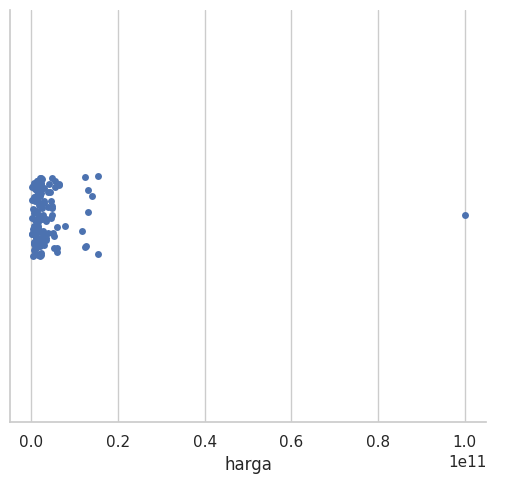

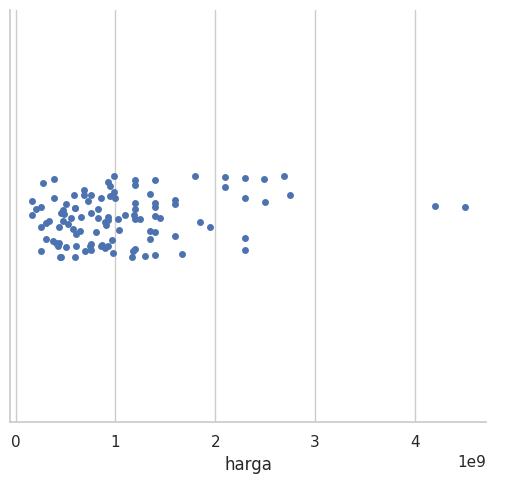

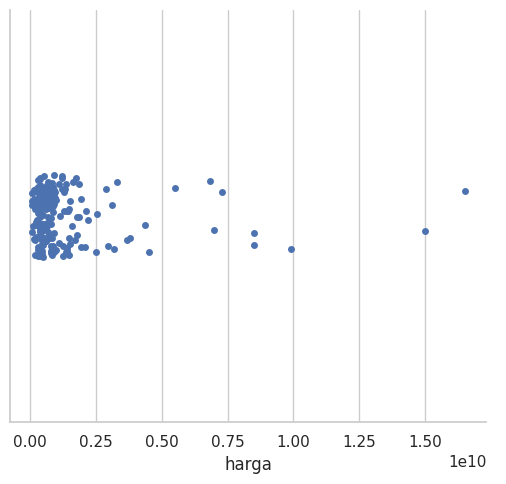

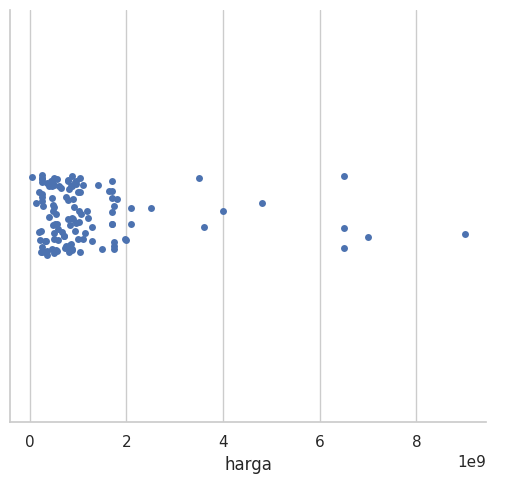

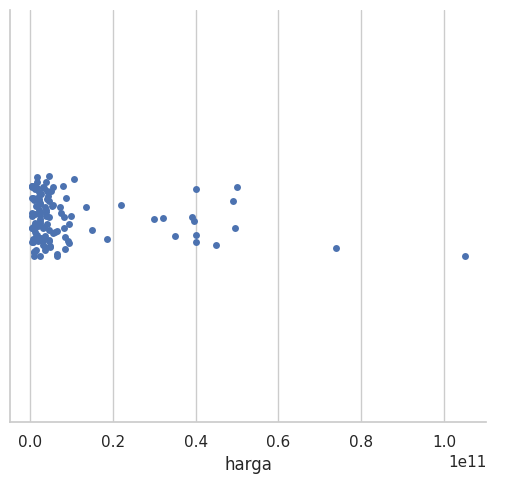

In [ ]:
# Tangerang
p = sns.catplot(x = 'harga', data = dfT2)

# Bekasi
p = sns.catplot(x = 'harga', data = dfX2)

# Bogor
p = sns.catplot(x = 'harga', data = dfB2)

# Depok
p = sns.catplot(x = 'harga', data = dfD2)

# Jakarta
p = sns.catplot(x = 'harga', data = dfJ)

Dari 5 visualisasi dan rata rata di atas, rata-rata harga rumah kota Jakarta dan tangerang cenderung lebih mahal dibandingkan dengan kota lainnya

**3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

Hasil analisis menunjukkan bahwa rata-rata harga rumah di Jakarta dan Tangerang secara signifikan lebih tinggi dibandingkan dengan kota lainnya seperti Bekasi, Bogor, dan Depok. Hal ini dapat terlihat dari perbandingan statistik yang dihimpun, di mana:

- Jakarta memiliki rata-rata harga rumah tertinggi, mencerminkan statusnya sebagai ibu kota dan pusat ekonomi.
- Tangerang, yang juga merupakan daerah yang berkembang pesat dengan infrastruktur yang terus ditingkatkan, menunjukkan harga rumah yang mendekati Jakarta, menunjukkan daya tariknya bagi para pembeli.
- Bekasi memiliki rata-rata harga rumah terendah dibanding kota lainnya.

**4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di atas)**

Kami merekomendasikan Tangerang (BSD) karena BSD di Tangerang adalah salah satu kawasan paling berkembang di Jabodetabek dengan rentang harga rumah yang beragam dan tinggi, menunjukkan potensi pasar perumahan yang aktif dan Tangerang berkembang pesat dengan banyak proyek infrastruktur dan transportasi yang menarik bagi pembeli yang mencari alternatif di luar Jakarta

##### Jumlah Kamar Tidur di tiap kota

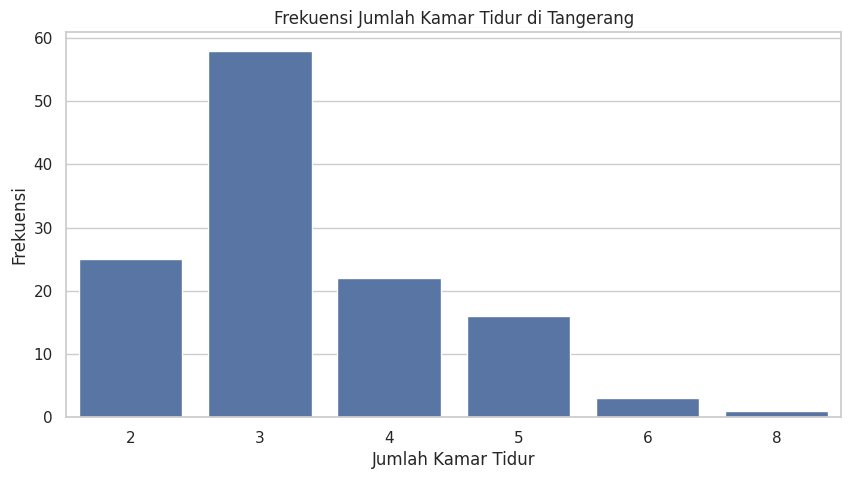

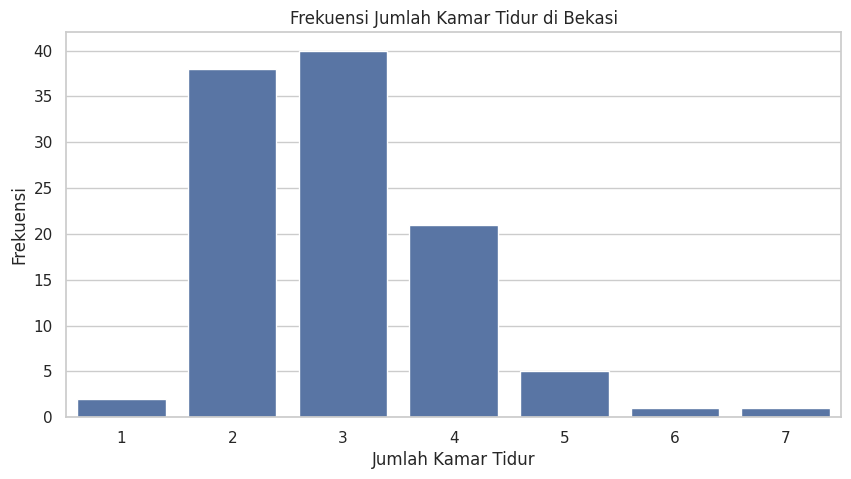

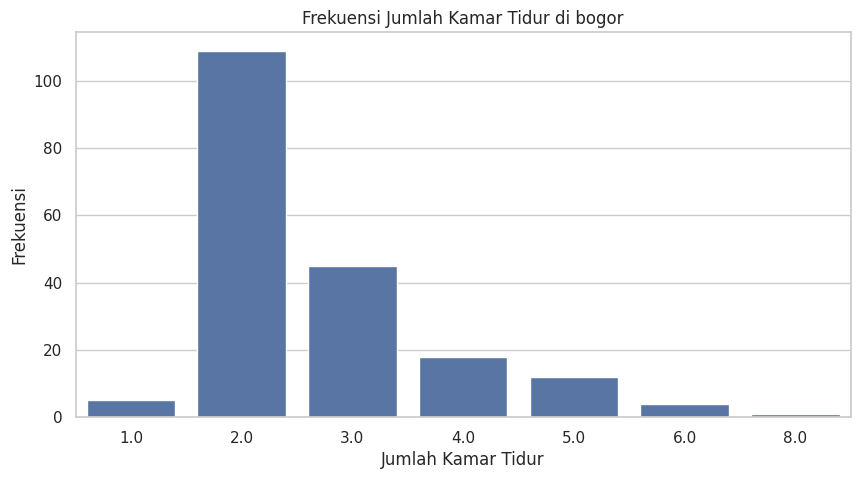

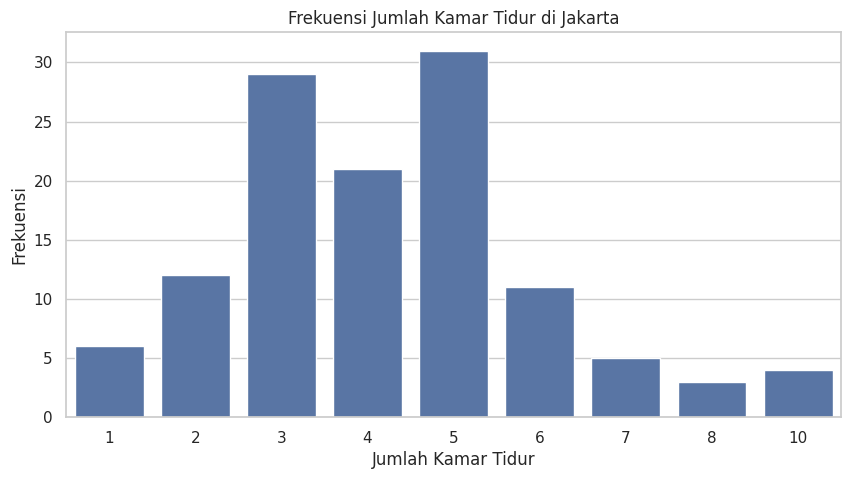

In [ ]:
# Tangerang
jumlah_kamar = dfT2['KT'].value_counts().reset_index()
jumlah_kamar.columns = ['Jumlah Kamar Tidur', 'Frekuensi']
plt.figure(figsize=(10, 5))
sns.barplot(data=jumlah_kamar, x='Jumlah Kamar Tidur', y='Frekuensi')
plt.title('Frekuensi Jumlah Kamar Tidur di Tangerang')
plt.show()

# Bekasi
jumlah_kamar = dfX2['KT'].value_counts().reset_index()
jumlah_kamar.columns = ['Jumlah Kamar Tidur', 'Frekuensi']
plt.figure(figsize=(10, 5))
sns.barplot(data=jumlah_kamar, x='Jumlah Kamar Tidur', y='Frekuensi')
plt.title('Frekuensi Jumlah Kamar Tidur di Bekasi')
plt.show()

# Bogor
jumlah_kamar = dfB2['KT'].value_counts().reset_index()
jumlah_kamar.columns = ['Jumlah Kamar Tidur', 'Frekuensi']
plt.figure(figsize=(10, 5))
sns.barplot(data=jumlah_kamar, x='Jumlah Kamar Tidur', y='Frekuensi')
plt.title('Frekuensi Jumlah Kamar Tidur di bogor')
plt.show()

# Jakarta
jumlah_kamar = dfJ['KT'].value_counts().reset_index()
jumlah_kamar.columns = ['Jumlah Kamar Tidur', 'Frekuensi']
plt.figure(figsize=(10, 5))
sns.barplot(data=jumlah_kamar, x='Jumlah Kamar Tidur', y='Frekuensi')
plt.title('Frekuensi Jumlah Kamar Tidur di Jakarta')
plt.show()


##### Jumlah Garasi di tiap kota

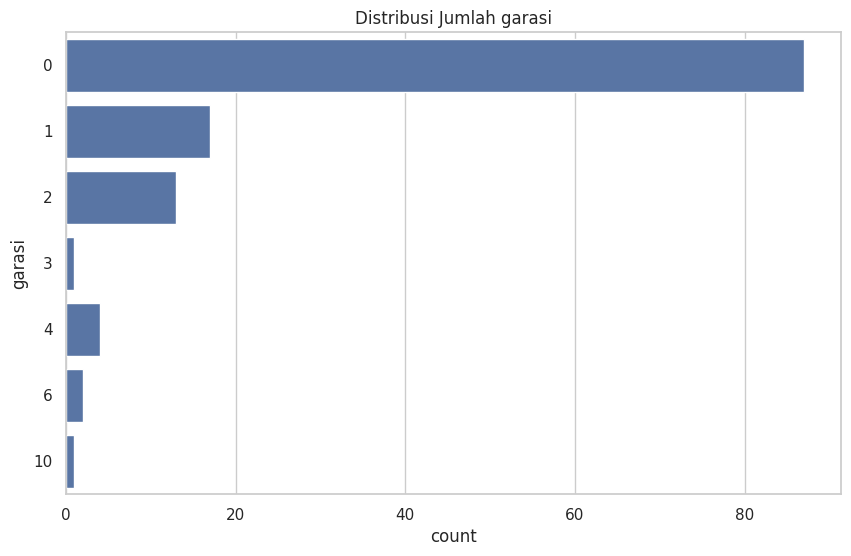

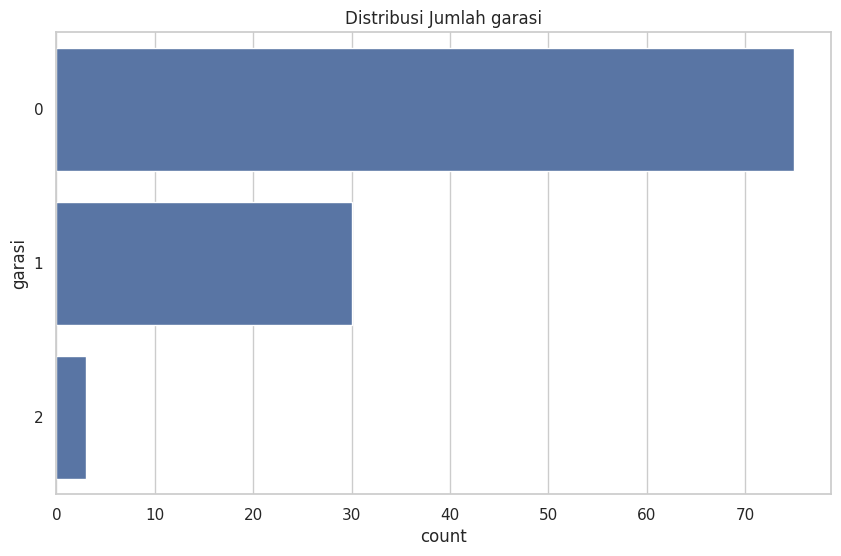

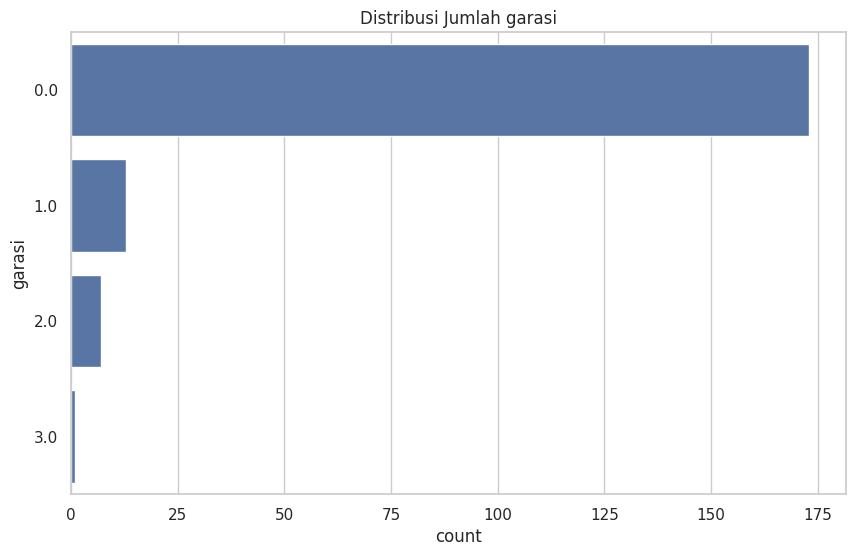

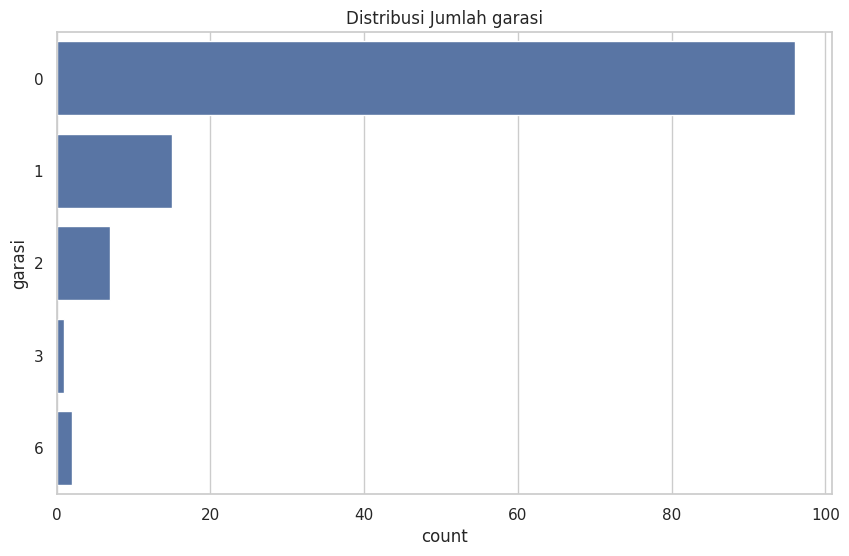

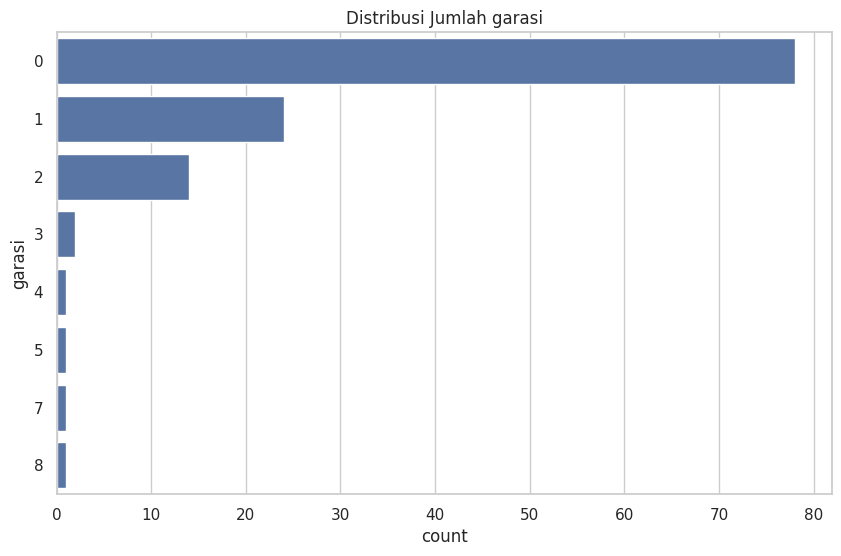

In [ ]:
# Tangerang
plt.figure(figsize=(10, 6))
sns.countplot(y='garasi', data=dfT2)
plt.title('Distribusi Jumlah garasi')
plt.show()

# Bekasi
plt.figure(figsize=(10, 6))
sns.countplot(y='garasi', data=dfX2)
plt.title('Distribusi Jumlah garasi')
plt.show()

# Bogor
plt.figure(figsize=(10, 6))
sns.countplot(y='garasi', data=dfB2)
plt.title('Distribusi Jumlah garasi')
plt.show()

# Depok
plt.figure(figsize=(10, 6))
sns.countplot(y='garasi', data=dfD2)
plt.title('Distribusi Jumlah garasi')
plt.show()

# Jakarta
plt.figure(figsize=(10, 6))
sns.countplot(y='garasi', data=dfJ)
plt.title('Distribusi Jumlah garasi')
plt.show()

**5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

Dari hasil analisis dan visualisasi yang dilakukan, terlihat bahwa rumah dengan karakteristik 3 kamar tidur dan tanpa garasi merupakan jenis properti yang paling banyak dijual di lima kota yang dianalisis, yaitu Jakarta, Tangerang, Bekasi, Bogor, dan Depok.

##### Rumah Potensial dibawah 25M

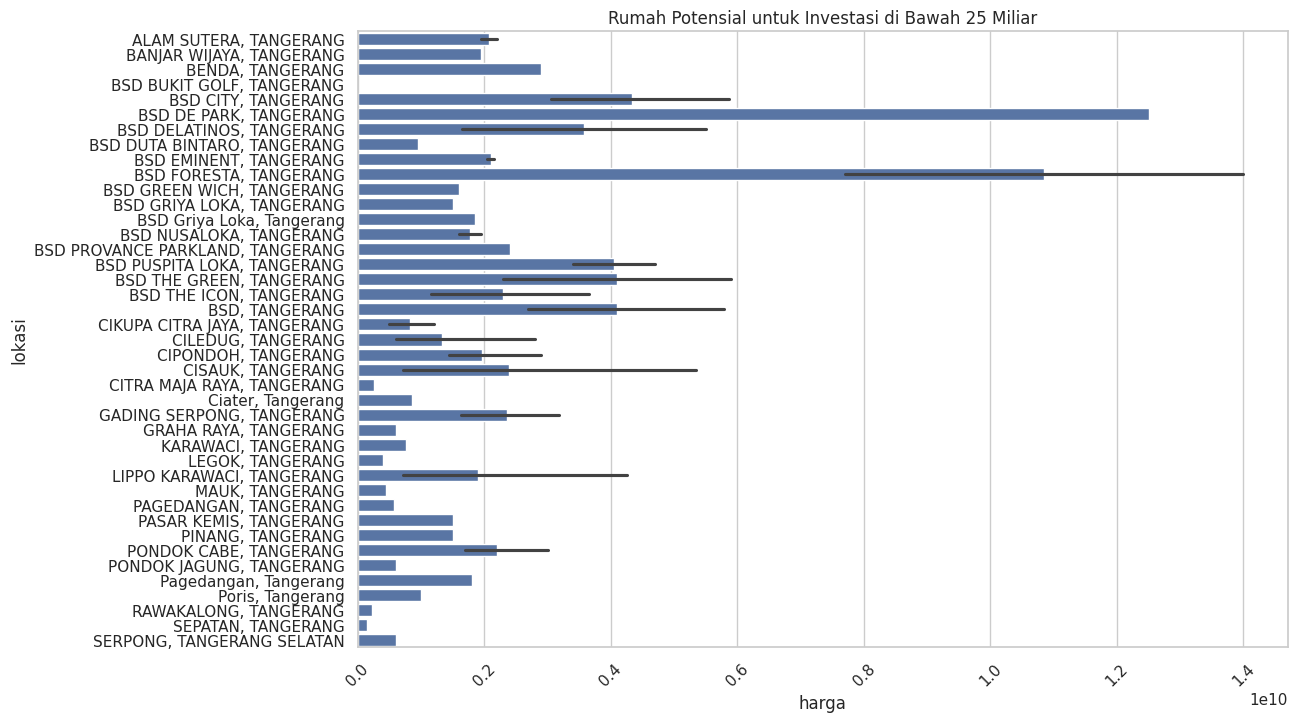

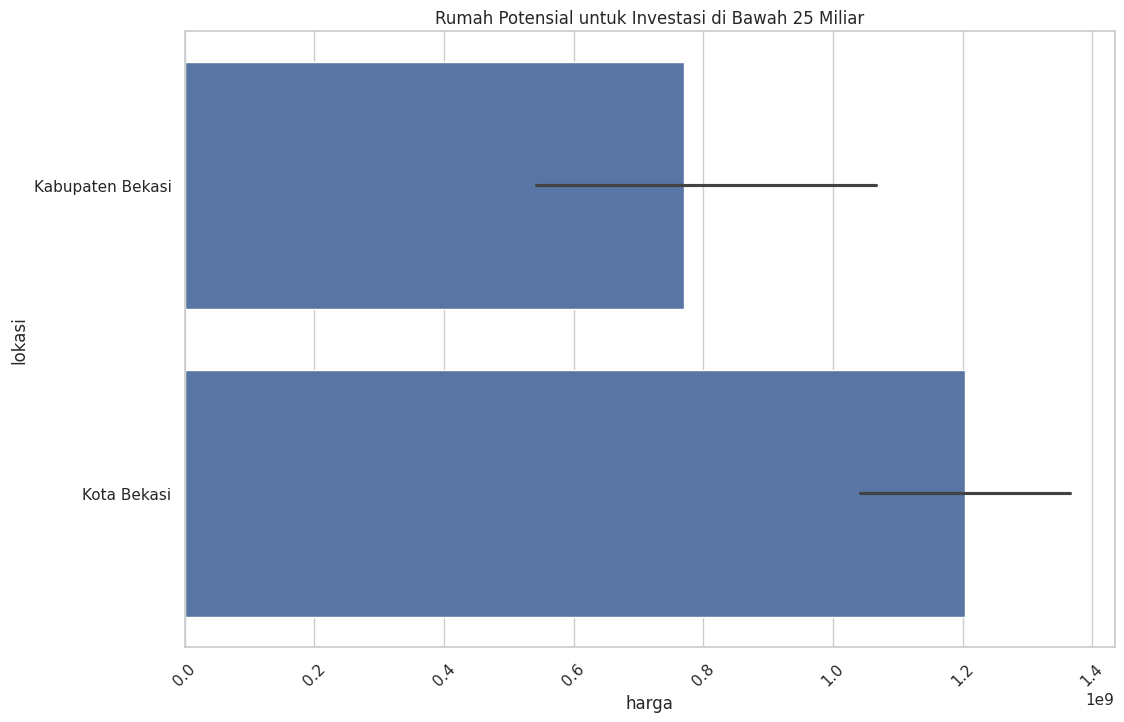

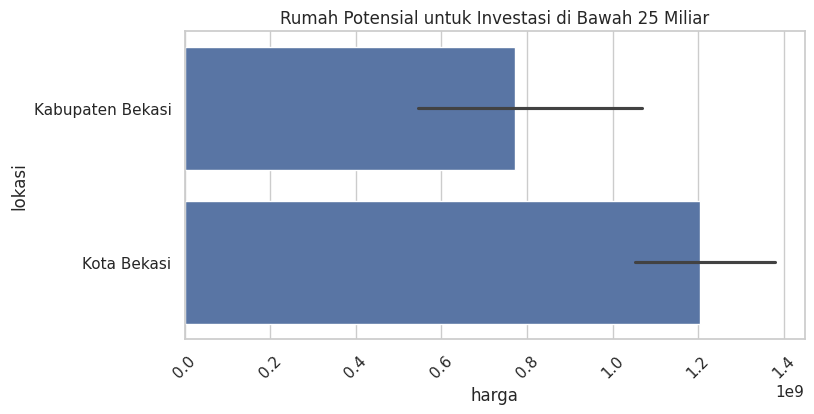

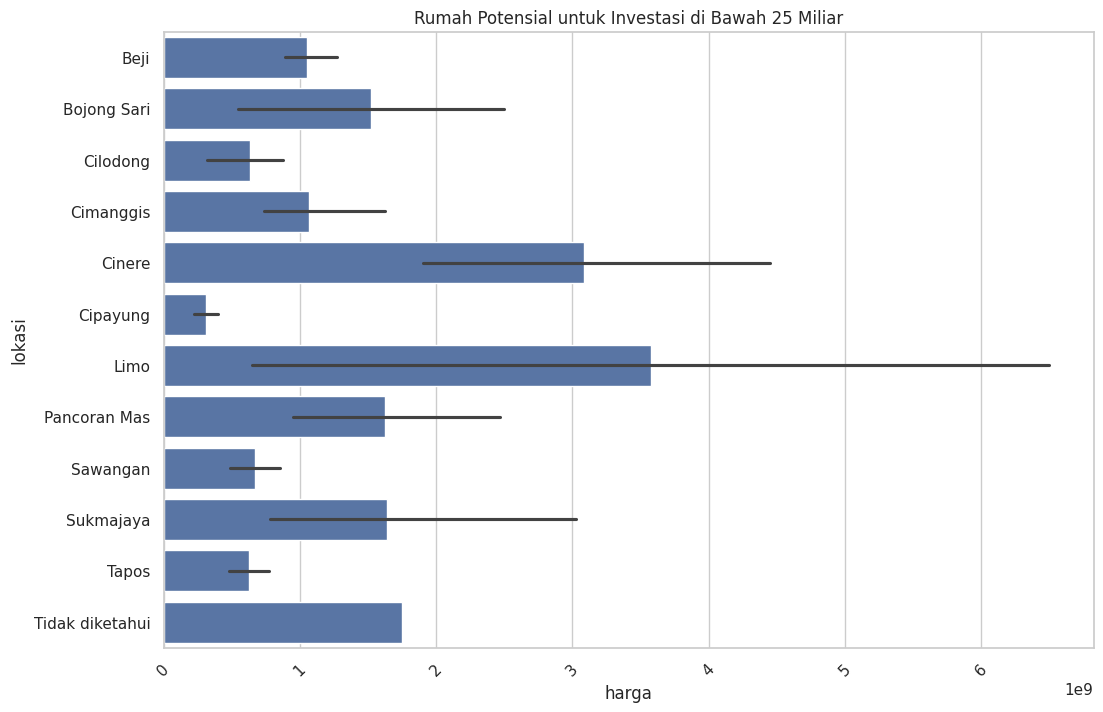

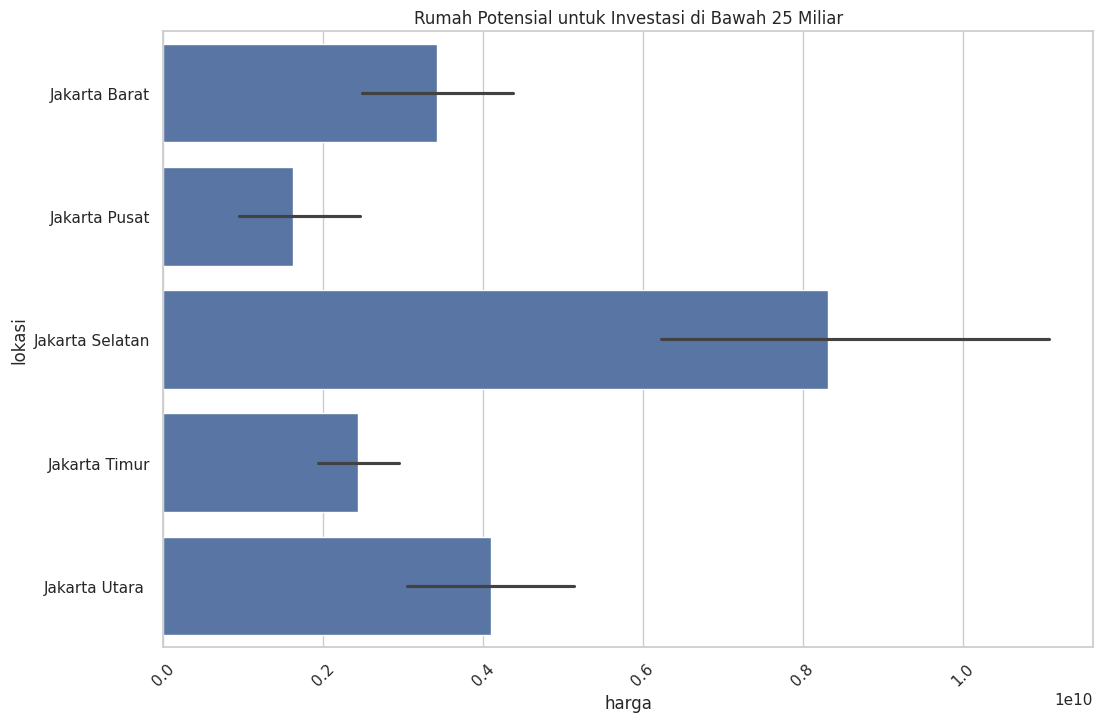

In [ ]:
# Tangerang
rumah_potensial = dfT2[dfT2['harga'] <= 25000000000]
plt.figure(figsize=(12, 8))
sns.barplot(x='harga', y='lokasi', data=rumah_potensial)
plt.title('Rumah Potensial untuk Investasi di Bawah 25 Miliar')
plt.xticks(rotation=45)
plt.show()

# Bekasi
rumah_potensial = dfX2[dfX2['harga'] <= 25000000000]
plt.figure(figsize=(12, 8))
sns.barplot(x='harga', y='lokasi', data=rumah_potensial)
plt.title('Rumah Potensial untuk Investasi di Bawah 25 Miliar')
plt.xticks(rotation=45)
plt.show()

# Bogor
plt.figure(figsize=(8, 4))
sns.barplot(x='harga', y='lokasi', data=rumah_potensial)
plt.title('Rumah Potensial untuk Investasi di Bawah 25 Miliar')
plt.xticks(rotation=45)
plt.show()

# Depok
rumah_potensial = dfD2[dfD2['harga'] <= 25000000000]
plt.figure(figsize=(12, 8))
sns.barplot(x='harga', y='lokasi', data=rumah_potensial)
plt.title('Rumah Potensial untuk Investasi di Bawah 25 Miliar')
plt.xticks(rotation=45)
plt.show()

# Jakarta
rumah_potensial = dfJ[dfJ['harga'] <= 25000000000]
plt.figure(figsize=(12, 8))
sns.barplot(x='harga', y='lokasi', data=rumah_potensial)
plt.title('Rumah Potensial untuk Investasi di Bawah 25 Miliar')
plt.xticks(rotation=45)
plt.show()

**6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan**


Dari visualisasi diatas didapatkan bahwa kota yang tepat untuk investasi dibawah 25 Miliar ialah BSD De Park karena Lokasi BSD De Park berada di kawasan yang strategis, dekat dengan akses jalan tol, pusat perbelanjaan, dan fasilitas umum lainnya, yang meningkatkan nilai investasi properti di daerah ini. BSD De Park berada dalam kawasan yang permintaan akan properti di daerah ini tetap tinggi, baik untuk penjualan maupun penyewaan, yang meningkatkan peluang keuntungan dari investasi.

##### Tren harga berdasarkan waktu

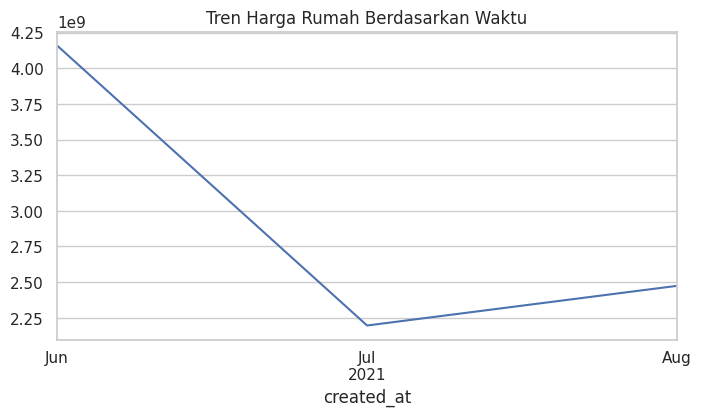

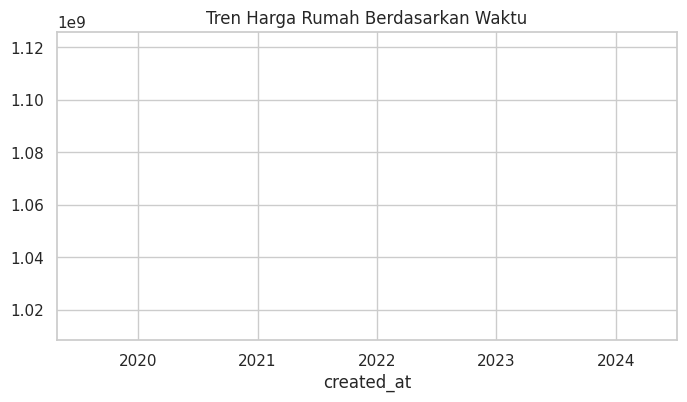

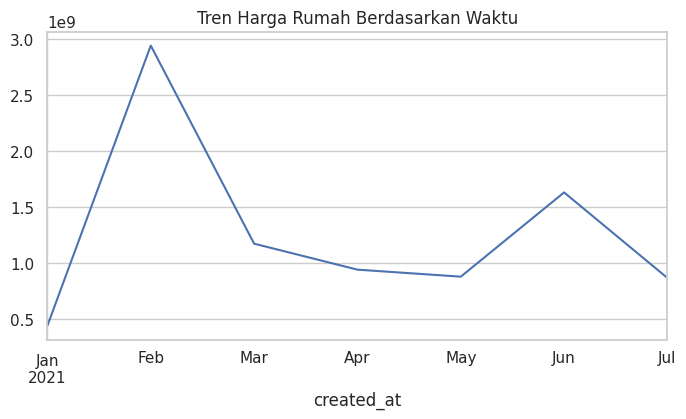

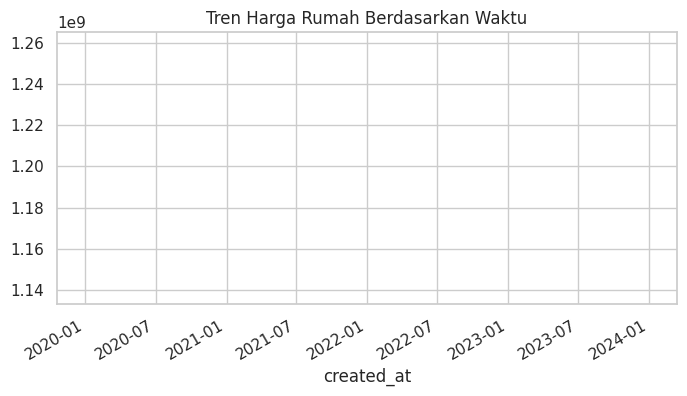

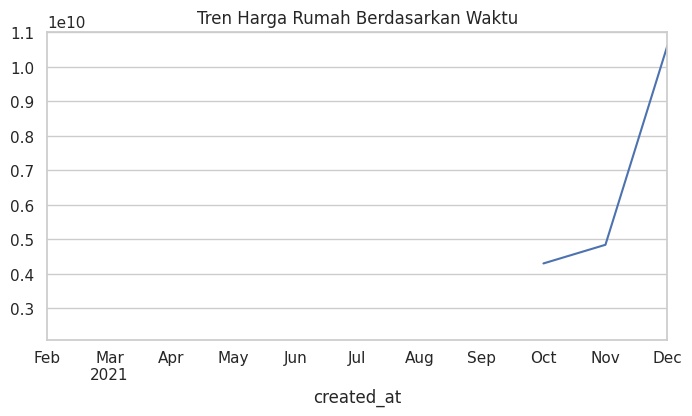

In [ ]:
# Tangerang
dfT2['created_at'] = pd.to_datetime(dfT2['created_at'])
dfT2.set_index('created_at', inplace=True)
plt.figure(figsize=(8, 4))
dfT2['harga'].resample('M').mean().plot()
plt.title('Tren Harga Rumah Berdasarkan Waktu')
plt.show()

# Bekasi
dfX2['created_at'] = pd.to_datetime(dfX2['created_at'])
dfX2.set_index('created_at', inplace=True)
plt.figure(figsize=(8, 4))
dfX2['harga'].resample('M').mean().plot()
plt.title('Tren Harga Rumah Berdasarkan Waktu')
plt.show()

# Bogor
dfB2['created_at'] = pd.to_datetime(dfB2['created_at'])
dfB2.set_index('created_at', inplace=True)
plt.figure(figsize=(8, 4))
dfB2['harga'].resample('M').mean().plot()
plt.title('Tren Harga Rumah Berdasarkan Waktu')
plt.show()

# Depok
dfD2['created_at'] = pd.to_datetime(dfD2['created_at'])
dfD2.set_index('created_at', inplace=True)
plt.figure(figsize=(8, 4))
dfD2['harga'].resample('M').mean().plot()
plt.title('Tren Harga Rumah Berdasarkan Waktu')
plt.show()

# Jakarta
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'])
dfJ.set_index('created_at', inplace=True)
plt.figure(figsize=(8, 4))
dfJ['harga'].resample('M').mean().plot()
plt.title('Tren Harga Rumah Berdasarkan Waktu')
plt.show()

**7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?**

Didapatkan menambahkan analisis tren berdasarkan waktu pada properti yang ditawarkan dapat memberikan informasi yang sangat berharga bagi RPPI. Dengan melihat perubahan harga properti dari waktu ke waktu, kita bisa memahami apakah harga properti di suatu kota mengalami kenaikan, stagnan, atau penurunan. Ini dapat memengaruhi keputusan investasi dan strategi pengembangan perusahaan.

Dari visualisasi diatas didapatkan kota dengan tren harga rumah berdasarkan waktu adalah Jakarta.

Akan tetapi, untuk data di kota bekasi dan depok itu **tidak ada tren waktu** dikarenakan data yang kita miliki hanya terdapat pada bulan yang sama , yang artinya tidak memiliki variasi waktu yang cukup untuk melakukan analisis tren jangka panjang.

# Kesimpulan

1. Kualitas Data Perlu Ditingkatkan:
Ditemukan bahwa kualitas data yang ada belum optimal karena terdapat missing values dan ketidaksamaan satuan harga antara kota-kota seperti Depok dan Tangerang dengan kota lainnya. Hal ini dapat menghambat analisis yang akurat dan pengambilan keputusan yang tepat.
2. Lokasi Kantor Cabang Baru:
Berdasarkan potensi pasar, Tangerang merupakan lokasi yang paling strategis untuk membuka kantor cabang baru. Kawasan ini memiliki pertumbuhan properti yang stabil dan permintaan yang tinggi, sehingga membuka cabang di sana dapat memperluas cakupan bisnis dan meningkatkan akses ke pasar potensial.
3. Karakteristik Properti yang Paling Diminati:
Rumah dengan 3 kamar tidur dan tanpa garasi adalah yang paling diminati di pasar. Hal ini menunjukkan preferensi konsumen terhadap rumah dengan ukuran sedang, yang kemungkinan lebih terjangkau dan sesuai dengan kebutuhan keluarga menengah.
4. Rekomendasi Investasi Properti di Bawah Rp. 25 Miliar:
Properti di BSD De Park, Tangerang merupakan pilihan yang sangat potensial untuk investasi dengan anggaran di bawah Rp. 25 miliar. Kawasan ini berkembang pesat dan memiliki nilai properti yang terus meningkat, menjadikannya tempat yang ideal untuk berinvestasi dalam jangka pendek maupun panjang.
5. Tren Investasi di Jakarta:
Analisis tren waktu menunjukkan bahwa Jakarta mengalami kenaikan harga properti yang konsisten. Ini menandakan Jakarta sebagai pasar yang berpotensi menghasilkan keuntungan jangka panjang melalui apresiasi nilai properti.

# Saran

1. Perbaikan Kualitas Data:

RPPI harus berinvestasi dalam peningkatan kualitas data dengan melibatkan tim Data Engineer/DBA untuk memperbaiki missing values dan menyamakan satuan harga di semua kota.
Diharapkan ke depannya, kualitas data yang lebih baik dapat mendukung pengambilan keputusan yang lebih cepat, tepat, dan akurat, sehingga RPPI dapat lebih mudah menjadi perusahaan yang data-driven.

2. Buka Kantor Cabang Baru di Tangerang:

Dengan melihat potensi pertumbuhan properti yang kuat dan permintaan pasar yang tinggi di Tangerang, RPPI disarankan untuk segera membuka kantor cabang baru di sana. Hal ini akan membantu RPPI memperluas jaringan dan lebih efektif menangkap peluang pasar di daerah yang berkembang pesat.

3. Fokus pada Produk Properti yang Diminati Pasar:

Karena rumah dengan 3 kamar tidur dan tanpa garasi paling diminati, RPPI dapat mengembangkan lebih banyak properti dengan karakteristik ini di kota-kota yang dianalisis. Menyesuaikan penawaran dengan permintaan pasar akan meningkatkan penjualan dan keuntungan perusahaan.

4. Investasi di BSD De Park dan Kawasan Potensial Lainnya:

BSD De Park, Tangerang, adalah tempat yang sangat direkomendasikan untuk investasi properti di bawah Rp. 25 miliar. RPPI sebaiknya mengalokasikan sumber daya untuk membeli properti di kawasan ini karena potensinya yang tinggi untuk pertumbuhan nilai.
Selain itu, investasi di Jakarta juga harus dipertimbangkan karena tren harga di sana menunjukkan kenaikan yang stabil. Ini akan memberikan keuntungan yang besar dalam jangka panjang.

5. trategi Investasi Berdasarkan Tren Waktu:

Dengan memanfaatkan analisis tren waktu, RPPI dapat membuat strategi investasi yang lebih efektif dengan menargetkan kota-kota yang menunjukkan pertumbuhan harga yang konsisten, seperti Jakarta. Strategi ini akan memungkinkan RPPI untuk memaksimalkan keuntungan dengan mengikuti momentum pasar.

Dengan langkah-langkah ini, RPPI akan berada pada posisi yang kuat untuk memanfaatkan peluang pasar yang ada, meningkatkan kualitas data, dan melakukan ekspansi yang lebih terarah dan menguntungkan.

In [1]:
!git clone https://github.com/Yuliana1453/Data-Mining.git

Cloning into 'Data-Mining'...
